# E-commerce Transaction and Customer Analysis

# Problem Statement
The objective of this analysis is to explore customer, seller, product, order, and payment details to derive actionable insights that can inform business decisions. The goal is to understand customer purchasing behavior, identify product trends, analyze geographical sales, and assess the performance of sellers. The analysis will also focus on key transaction metrics such as revenue, product sales, and payment methods. Additionally, the project can serve as a foundation for predictive modeling and recommendations, helping to identify high-value customers, forecast sales, and optimize the supply chain.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

# Define the folder path

folder_path = 'C:\\Users\\LENOVO\\Documents\\E Commerce DA Project'

# Get the list of CSV files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
# list comprehension [ expression  iteration]

# Create a dictionary to store DataFrames
dataframes = {}

# Read each CSV file and store it in the dictionary with the desired DataFrame name
for file in csv_files:
    df_name = file.split('.')[0] + '_df'
    dataframes[df_name] = pd.read_csv(os.path.join(folder_path, file))

# Access the DataFrames
customers_df = dataframes.get('customers_df')
products_df = dataframes.get('products_df')
sellers_df = dataframes.get('sellers_df')
geolocation_df = dataframes.get("geolocation_df")
payments_df = dataframes.get("payments_df")
orders_df = dataframes.get("orders_df")
order_items_df = dataframes.get("order_items_df")

In [2]:
products_df = pd.read_csv('products.csv')
geolocation_df = pd.read_csv('geolocation.csv')
payments_df = pd.read_csv('payments.csv')
orders_df = pd.read_csv('orders.csv')
order_items_df = pd.read_csv("order_items.csv")
customers_df = pd.read_csv("customers.csv")
sellers_df = pd.read_csv("sellers.csv")

In [79]:
products_df.head()

product_id product category  product_name_length  \
0  1e9e8ef04dbcff4541ed26657ea517e5        perfumery                 40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f              Art                 44.0   
2  96bd76ec8810374ed1b65e291975717f    sport leisure                 46.0   
3  cef67bcfe19066a932b7673e239eb23d           babies                 27.0   
4  9dc1a7de274444849c219cff195d0b71       housewares                 37.0   

   product_description_length  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       276.0                 1.0            1000.0   
2                       250.0                 1.0             154.0   
3                       261.0                 1.0             371.0   
4                       402.0                 4.0             625.0   

   product_length_cm  product_height_cm  product_width_cm  
0               16.0               10.0              14.0  
1               30.0               18.0              20.0  
2               18.0                9.0              15.0  
3               26.0                4.0              26.0  
4               20.0               17.0              13.0

In [81]:
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [83]:
payments_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [85]:
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [87]:
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [89]:
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [91]:
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:


# CSV files and their corresponding MySQL table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sales'),
    ('products.csv', 'products'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items'),
    ('geolocation.csv', 'geolocation')# You can add more CSV files as needed
]

# MySQL database connection details
conn = mysql.connector.connect(
    host='localhost',         # Replace with your MySQL host (e.g., 'localhost')
    user='root',     # Replace with your MySQL username (e.g., 'root')
    password='nilesh123', # Replace with your MySQL password
    database='ecommerce'  # Replace with your database name
)
cursor = conn.cursor()

# Folder path where your CSV files are located
folder_path = 'C:\\Users\\LENOVO\\Documents\\E Commerce DA Project'  # Replace with the path to the folder containing CSV files

# Function to determine SQL data types based on pandas data types
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Process each CSV file
for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read CSV into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN values with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Clean column names by replacing spaces, hyphens, etc.
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Create SQL table if it doesn't exist, based on DataFrame structure
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert each row into the SQL table
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit changes after each CSV file is processed
    conn.commit()

# Close the database connection
conn.close()


In [3]:
db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "nilesh123",
                            database = "ecommerce")

cur = db.cursor()

In [15]:
dataframes = {
    'products_df': products_df,
    'geolocation_df': geolocation_df,
    'payments_df': payments_df,
    'orders_df': orders_df,
    'order_items_df': order_items_df,
    'customers_df': customers_df,
    'sellers_df': sellers_df
}

for df_name, df in dataframes.items():
    print(f"{df_name}:")
    print(f"Shape: {df.shape}")
    print(f"Size: {df.size}")
    print('-' * 50)

products_df:
Shape: (32951, 9)
Size: 296559
--------------------------------------------------
geolocation_df:
Shape: (1000163, 5)
Size: 5000815
--------------------------------------------------
payments_df:
Shape: (103886, 5)
Size: 519430
--------------------------------------------------
orders_df:
Shape: (99441, 8)
Size: 795528
--------------------------------------------------
order_items_df:
Shape: (112650, 7)
Size: 788550
--------------------------------------------------
customers_df:
Shape: (99441, 5)
Size: 497205
--------------------------------------------------
sellers_df:
Shape: (3095, 4)
Size: 12380
--------------------------------------------------


In [12]:
for df_name, df in dataframes.items():
    print(f"{df_name}:")
    print("Null Values:\n", df.isnull().sum())
    print('-' * 40)

products_df:
Null Values:
 product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
----------------------------------------
geolocation_df:
Null Values:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
----------------------------------------
payments_df:
Null Values:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
----------------------------------------
orders_df:
Null Values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase

In [18]:
for df_name, df in dataframes.items():
    print(f"{df_name}:")
    print("DataFrame Info:\n", df.info())
    print('-' * 40)

products_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product category            32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
DataFrame Info:
 None
----------------------------------------
geolocation_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Colu

In [13]:
# Assuming your dataframe is called df
state_mapping = {
    'SP': 'São Paulo',
    'SC': 'Santa Catarina',
    'MG': 'Minas Gerais',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RS': 'Rio Grande do Sul',
    'PA': 'Pará',
    'GO': 'Goiás',
    'ES': 'Espírito Santo',
    'BA': 'Bahia',
    'MA': 'Maranhão',
    'MS': 'Mato Grosso do Sul',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'RN': 'Rio Grande do Norte',
    'PE': 'Pernambuco',
    'MT': 'Mato Grosso',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'AL': 'Alagoas',
    'RO': 'Rondônia',
    'PB': 'Paraíba',
    'TO': 'Tocantins',
    'PI': 'Piauí',
    'AC': 'Acre',
    'SE': 'Sergipe',
    'RR': 'Roraima'
}

# Replace the customer_state column values with full state names
customers_df['customer_state'] = customers_df['customer_state'].replace(state_mapping)

# Check the updated dataframe
customers_df.head()


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca      São Paulo  
1                      9790  sao bernardo do campo      São Paulo  
2                      1151              sao paulo      São Paulo  
3                      8775        mogi das cruzes      São Paulo  
4                     13056               campinas      São Paulo

# List all unique cities where customers are located 

In [39]:
unique_cities =list(customers_df["customer_city"].unique())
print(unique_cities)

['franca', 'sao bernardo do campo', 'sao paulo', 'mogi das cruzes', 'campinas', 'jaragua do sul', 'timoteo', 'curitiba', 'belo horizonte', 'montes claros', 'rio de janeiro', 'lencois paulista', 'caxias do sul', 'piracicaba', 'guarulhos', 'pacaja', 'florianopolis', 'aparecida de goiania', 'santo andre', 'goiania', 'cachoeiro de itapemirim', 'sao jose dos campos', 'sao roque', 'camacari', 'resende', 'sumare', 'novo hamburgo', 'sao luis', 'sao jose', 'santa barbara', 'ribeirao preto', 'ituiutaba', 'taquarituba', 'sao jose dos pinhais', 'barrinha', 'parati', 'dourados', 'trindade', 'cascavel', 'fortaleza', 'brasilia', 'pelotas', 'porto alegre', 'salto', 'jundiai', 'cacapava', 'sao vicente', 'uberlandia', 'botelhos', 'sao goncalo', 'araucaria', 'nova iguacu', 'areia branca', 'campos dos goytacazes', 'sao carlos', 'itajuba', 'cruz das almas', 'vassouras', 'feira de santana', 'niteroi', 'sobral', 'divinopolis', 'paraiba do sul', 'paulista', 'carapicuiba', 'bom principio', 'astolfo dutra', 'ma

In [14]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["City"])
df.head()

City
0                 franca
1  sao bernardo do campo
2              sao paulo
3        mogi das cruzes
4               campinas

In [19]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

orders_2016 = orders_df[orders_df['order_purchase_timestamp'].dt.year == 2016]

orders_2017 = orders_df[orders_df['order_purchase_timestamp'].dt.year == 2017]

orders_2018 = orders_df[orders_df['order_purchase_timestamp'].dt.year == 2018]

count_orders_2016 = orders_2016.shape[0]
count_orders_2017 = orders_2017.shape[0]
count_orders_2018 = orders_2018.shape[0]

print(f"Number of orders placed in 2016: {count_orders_2016}")
print(f"Number of orders placed in 2017: {count_orders_2017}")
print(f"Number of orders placed in 2018: {count_orders_2018}")


Number of orders placed in 2017: 329
Number of orders placed in 2017: 45101
Number of orders placed in 2018: 54011


In the years analyzed, there was a noticeable increase in order volume. In 2016, there were 329 orders. This grew significantly to 45,101 in 2017, and further increased to 54,011 in 2018. This trend indicates a substantial rise in customer engagement and sales over these years.

In [20]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

orders_df['order_year'] = orders_df['order_purchase_timestamp'].dt.year

order_counts_by_year = orders_df[orders_df['order_year'].isin([2016, 2017, 2018])].groupby('order_year').size()

print(order_counts_by_year)


order_year
2016      329
2017    45101
2018    54011
dtype: int64


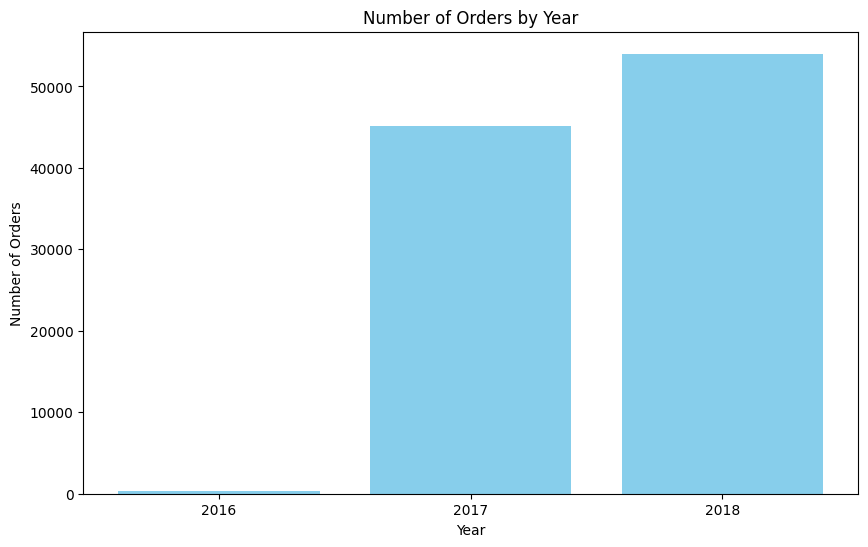

In [81]:
years = order_counts_by_year.index
order_counts = order_counts_by_year.values

# Plot
plt.figure(figsize=(10, 6))
plt.bar(years, order_counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Year')
plt.xticks(years)
plt.grid(False)
plt.show()

In [27]:
query = """ select year(order_purchase_timestamp),count(order_id) from orders group by year(order_purchase_timestamp) order by year(order_purchase_timestamp) asc"""

cur.execute(query)

data = cur.fetchall()

print("Total orders placed in 2016 are", data[0][1])
print("Total orders placed in 2017 are", data[1][1])
print("Total orders placed in 2018 are", data[2][1])

Total orders placed in 2016 are 329
Total orders placed in 2017 are 45101
Total orders placed in 2018 are 54011


# Find the total Sales per Category

In [30]:
order_items_products_df = pd.merge(order_items_df, products_df, on='product_id')

merged_df = pd.merge(order_items_products_df, payments_df, on='order_id')

total_sales_per_category = merged_df.groupby('product category')['payment_value'].sum().sort_values(ascending = False).reset_index()

total_sales_per_category = total_sales_per_category.rename(columns={'product category': 'Category', 'payment_value': 'Sales'})

total_sales_per_category

Category       Sales
0                bed table bath  1712553.67
1                 HEALTH BEAUTY  1657373.12
2          computer accessories  1585330.45
3          Furniture Decoration  1430176.39
4               Watches present  1429216.68
..                          ...         ...
68                     PC Gamer     2174.43
69              House Comfort 2     1710.54
70               cds music dvds     1199.43
71  Fashion Children's Clothing      785.67
72       insurance and services      324.51

[73 rows x 2 columns]

The analysis of total sales by product category reveals that the bed table bath category leads with sales of 1,712,553.67, followed closely by HEALTH BEAUTY at 1,657,373.12. Other notable categories include computer accessories and Furniture Decoration, indicating diverse customer interests and significant revenue contributions across various product segments.


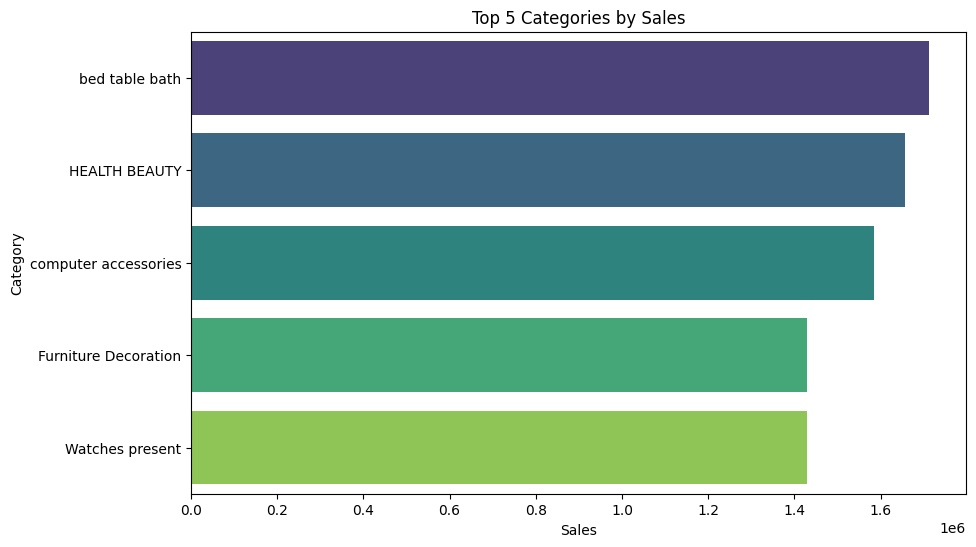

In [85]:
top_5_sales = total_sales_per_category.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Category', data=top_5_sales, palette='viridis')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.title('Top 5 Categories by Sales')
plt.grid(False)
plt.show()

In [31]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
order by sales desc
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

Category       Sales
0                BED TABLE BATH  1712553.67
1                 HEALTH BEAUTY  1657373.12
2          COMPUTER ACCESSORIES  1585330.45
3          FURNITURE DECORATION  1430176.39
4               WATCHES PRESENT  1429216.68
..                          ...         ...
69                     PC GAMER     2174.43
70              HOUSE COMFORT 2     1710.54
71               CDS MUSIC DVDS     1199.43
72  FASHION CHILDREN'S CLOTHING      785.67
73       INSURANCE AND SERVICES      324.51

[74 rows x 2 columns]

# Calculat the percentage of orders that were paid in installments

In [36]:
total_orders = payments_df['order_id'].nunique()

orders_with_installments = payments_df[payments_df['payment_installments'] >= 1]['order_id'].nunique()

percentage_installments = (orders_with_installments / total_orders) * 100

print(f"Percentage of orders paid in installments: {percentage_installments:.5f}%")


Percentage of orders paid in installments: 99.99799%


The analysis shows that an overwhelming 99.998% of orders were paid in installments, highlighting a strong customer preference for flexible payment options.

In [34]:
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments
"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Count the number of customer from each state

In [14]:
state_counts = customers_df['customer_state'].value_counts()

print(state_counts)


customer_state
São Paulo              41746
Rio de Janeiro         12852
Minas Gerais           11635
Rio Grande do Sul       5466
Paraná                  5045
Santa Catarina          3637
Bahia                   3380
Distrito Federal        2140
Espírito Santo          2033
Goiás                   2020
Pernambuco              1652
Ceará                   1336
Pará                     975
Mato Grosso              907
Maranhão                 747
Mato Grosso do Sul       715
Paraíba                  536
Piauí                    495
Rio Grande do Norte      485
Alagoas                  413
Sergipe                  350
Tocantins                280
Rondônia                 253
Amazonas                 148
Acre                      81
Amapá                     68
Roraima                   46
Name: count, dtype: int64


The data reveals that São Paulo has the highest customer count at 41,746, followed by Rio de Janeiro with 12,852. This indicates a significant concentration of customers in these two states.

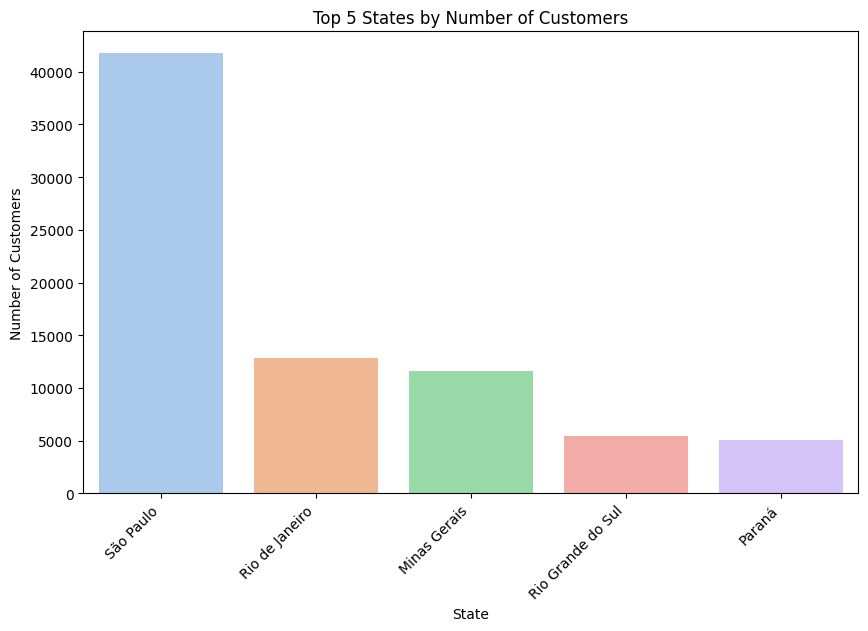

In [15]:
top_5_states = state_counts.head(5).reset_index()
top_5_states.columns = ['State', 'Number of Customers']

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Number of Customers', data=top_5_states, palette='pastel')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Top 5 States by Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

In [16]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)
df

state  customer_count
0     SP           41746
4     RJ           12852
2     MG           11635
5     RS            5466
3     PR            5045
1     SC            3637
9     BA            3380
13    DF            2140
8     ES            2033
7     GO            2020
15    PE            1652
12    CE            1336
6     PA             975
16    MT             907
10    MA             747
11    MS             715
21    PB             536
23    PI             495
14    RN             485
19    AL             413
25    SE             350
22    TO             280
20    RO             253
17    AM             148
24    AC              81
18    AP              68
26    RR              46

# Calculate the number of orders per month 

In [94]:
orders_2017 = orders_df[orders_df['order_purchase_timestamp'].dt.year == 2017]

orders_2017['month'] = orders_2017['order_purchase_timestamp'].dt.to_period('M')

monthly_order_counts = orders_2017.groupby('month').size()

monthly_order_counts_df = monthly_order_counts.reset_index(name='order_count').reset_index()

monthly_order_counts_df


index    month  order_count
0       0  2017-01          800
1       1  2017-02         1780
2       2  2017-03         2682
3       3  2017-04         2404
4       4  2017-05         3700
5       5  2017-06         3245
6       6  2017-07         4026
7       7  2017-08         4331
8       8  2017-09         4285
9       9  2017-10         4631
10     10  2017-11         7544
11     11  2017-12         5673

In 2017, we observed varying monthly order counts, indicating seasonal trends in customer purchases. Analyzing these patterns will aid in optimizing inventory and targeting marketing efforts effectively.

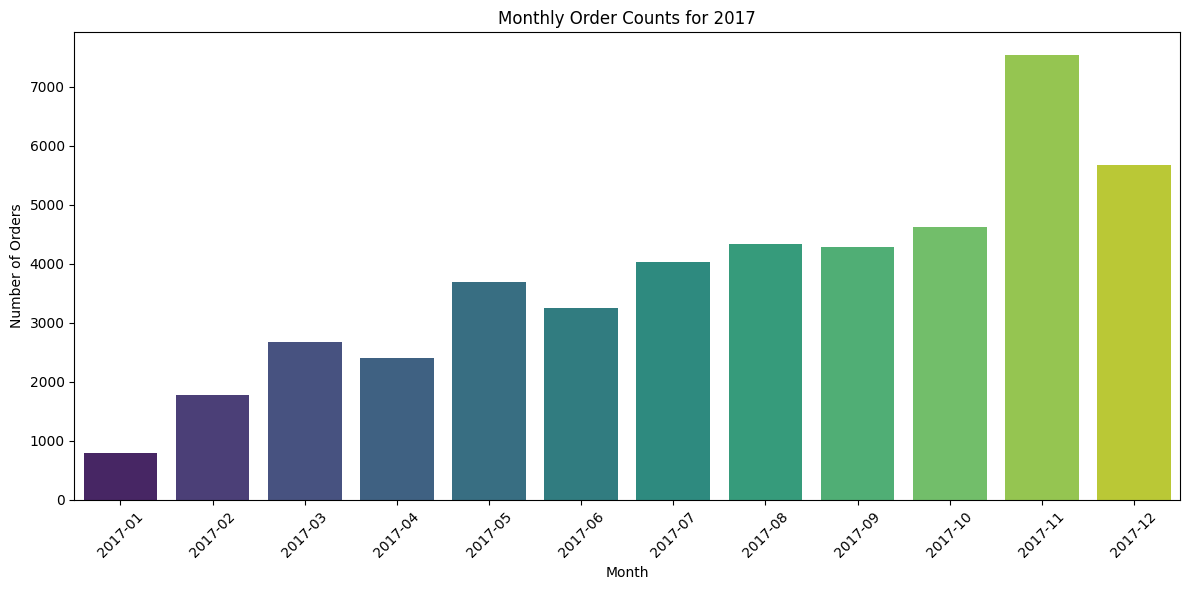

In [96]:
monthly_order_counts_df['month'] = monthly_order_counts_df['month'].astype(str) 

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='order_count', data=monthly_order_counts_df, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Counts for 2017')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [39]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
df

months  order_count
0       July         6292
1     August         6512
2   February         6728
3       June         6167
4      March         7211
5    January         7269
6        May         6873
7      April         6939
8  September           16
9    October            4

In [98]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

orders_2017_2018 = orders_df[orders_df['order_purchase_timestamp'].dt.year.isin([2016,2017, 2018])]

orders_2017_2018['year_month'] = orders_2017_2018['order_purchase_timestamp'].dt.to_period('M')

monthly_order_counts = orders_2017_2018.groupby('year_month').size()

monthly_order_counts_df = monthly_order_counts.reset_index(name='order_count').reset_index()

monthly_order_counts_df


index year_month  order_count
0       0    2016-09            4
1       1    2016-10          324
2       2    2016-12            1
3       3    2017-01          800
4       4    2017-02         1780
5       5    2017-03         2682
6       6    2017-04         2404
7       7    2017-05         3700
8       8    2017-06         3245
9       9    2017-07         4026
10     10    2017-08         4331
11     11    2017-09         4285
12     12    2017-10         4631
13     13    2017-11         7544
14     14    2017-12         5673
15     15    2018-01         7269
16     16    2018-02         6728
17     17    2018-03         7211
18     18    2018-04         6939
19     19    2018-05         6873
20     20    2018-06         6167
21     21    2018-07         6292
22     22    2018-08         6512
23     23    2018-09           16
24     24    2018-10            4

The analysis of monthly order counts from 2016 to 2018 reveals significant fluctuations in customer activity. Notably, November 2017 experienced a peak of 7,544 orders, likely influenced by promotional events. The consistent growth in orders leading into 2018 suggests an upward trend in customer engagement.

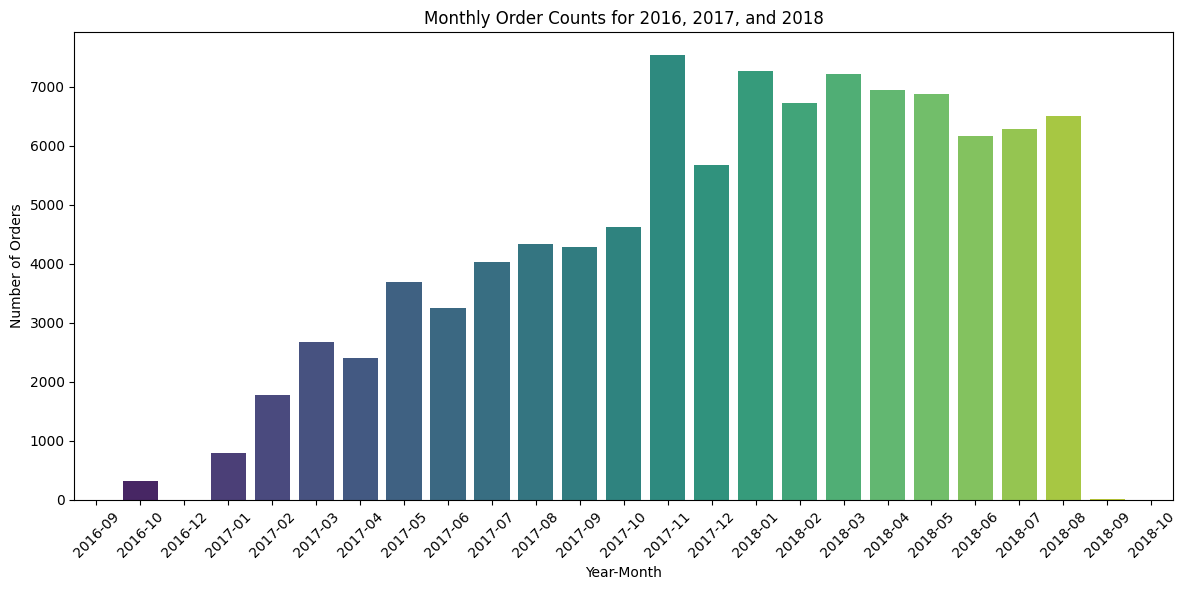

In [100]:
monthly_order_counts_df['year_month'] = monthly_order_counts_df['year_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='order_count', data=monthly_order_counts_df, palette='viridis')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Counts for 2016, 2017, and 2018')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

# Find the average number of products per order, grouped by customer city.

In [45]:
order_items_count = order_items_df.groupby('order_id')['order_id'].count().reset_index(name='product_count')

orders_with_product_count = orders_df.merge(order_items_count, on='order_id')

orders_with_customer_info = orders_with_product_count.merge(customers_df, on='customer_id')

average_products_per_city = orders_with_customer_info.groupby('customer_city')['product_count'].mean().round(2).reset_index()

average_products_per_city_sorted = average_products_per_city.sort_values(by='product_count', ascending=False)

average_products_per_city_sorted.head(10)


customer_city  product_count
2619      padre carvalho            7.0
907          celso ramos            6.5
756        candido godoi            6.0
1154               datas            6.0
2264      matias olimpio            5.0
2817             picarra            4.0
2395  morro de sao paulo            4.0
3821     teixeira soares            4.0
1146          curralinho            4.0
955           cidelandia            4.0

The analysis of average product counts per city reveals that Padre Carvalho leads with an average of 7 products per order, followed closely by Celso Ramos with 6.5. This trend indicates higher purchasing behavior in these locations, suggesting potential target markets for marketing and sales strategies.

In [41]:
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

customer city average products/order
0      padre carvalho                   7.00
1         celso ramos                   6.50
2       candido godoi                   6.00
3               datas                   6.00
4      matias olimpio                   5.00
5  morro de sao paulo                   4.00
6          cidelandia                   4.00
7             picarra                   4.00
8     teixeira soares                   4.00
9          curralinho                   4.00

# Calculate the percentage of total revenue contributed by each product category.

In [52]:
products_order_items_df = products_df.merge(order_items_df, on='product_id')

merged_df = products_order_items_df.merge(payments_df, on='order_id')

category_sales = merged_df.groupby(merged_df['product category'].str.upper())['payment_value'].sum().reset_index()

total_sales = merged_df['payment_value'].sum()

category_sales['sales_percentage'] = round((category_sales['payment_value'] / total_sales) * 100, 2)

category_sales_sorted = category_sales[['product category', 'sales_percentage']].sort_values(by='sales_percentage', ascending=False)

category_sales_sorted.columns = ['Category', 'percentage distribution']

category_sales_sorted.head(10)


Category  percentage distribution
7         BED TABLE BATH                     8.43
44         HEALTH BEAUTY                     8.16
15  COMPUTER ACCESSORIES                     7.81
72       WATCHES PRESENT                     7.04
38  FURNITURE DECORATION                     7.04
67         SPORT LEISURE                     6.86
49            HOUSEWARES                     5.39
4             AUTOMOTIVE                     4.20
42          GARDEN TOOLS                     4.13
21            COOL STUFF                     3.84

The analysis of sales distribution by product category reveals that Bed Table Bath leads with 8.43% of total sales, closely followed by Health Beauty at 8.16%. Other significant contributors include Computer Accessories and Watches Present, both exceeding 7%. This information highlights key areas for strategic focus and marketing efforts, as these categories demonstrate substantial customer interest and revenue potential. Targeting promotions and inventory management within these segments can enhance overall sales performance and optimize resource allocation.

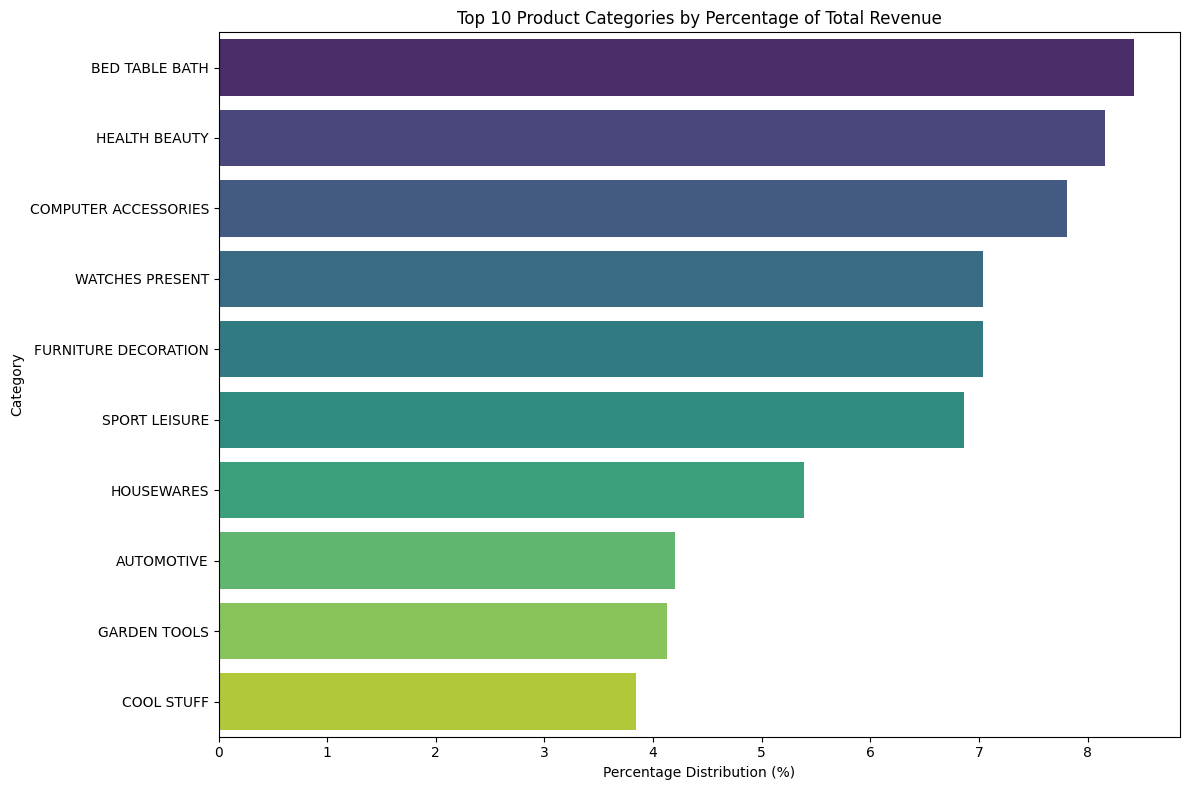

In [103]:
top_10_categories = category_sales_sorted.head(10)

plt.figure(figsize=(12, 8))

sns.barplot(x='percentage distribution', y='Category', data=top_10_categories, palette='viridis')

plt.xlabel('Percentage Distribution (%)')
plt.ylabel('Category')
plt.title('Top 10 Product Categories by Percentage of Total Revenue')

plt.tight_layout()
plt.show()


In [51]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

Category  percentage distribution
0        BED TABLE BATH                    10.70
1         HEALTH BEAUTY                    10.35
2  COMPUTER ACCESSORIES                     9.90
3  FURNITURE DECORATION                     8.93
4       WATCHES PRESENT                     8.93

# Identify the correlation between product price and the number of times a product has been purchased.

In [56]:
merged_df = products_df.merge(order_items_df, on='product_id')

category_stats = merged_df.groupby('product category').agg(
    order_count=('product_id', 'count'),
    price=('price', 'mean')
).reset_index()

correlation = category_stats['order_count'].corr(category_stats['price'])

print(f"The correlation is {correlation:.5f}")


The correlation is -0.10625


The correlation of -0.10625 indicates a weak negative relationship between the number of orders (order count) and the average price of products. This suggests that as the order count increases, the average price slightly tends to decrease, but the relationship is not strong.

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [107]:
seller_revenue_df = order_items_df.merge(payments_df, on='order_id').groupby('seller_id')['payment_value'].sum()

seller_revenue_df = seller_revenue_df.reset_index().assign(rank=lambda x: x['payment_value'].rank(method='dense', ascending=False).astype(int))

seller_revenue_df = seller_revenue_df.sort_values('rank').reset_index()

df = seller_revenue_df.head()

df


index                         seller_id  payment_value  rank
0   1535  7c67e1448b00f6e969d365cea6b010ab      507166.91     1
1    192  1025f0e2d44d7041d6cf58b6550e0bfa      308222.04     2
2    881  4a3ca9315b744ce9f8e9374361493884      301245.27     3
3    368  1f50f920176fa81dab994f9023523100      290253.42     4
4   1013  53243585a1d6dc2643021fd1853d8905      284903.08     5

The revenue analysis by seller indicates a clear ranking of performance. The top seller, with a revenue of 507,166.91, significantly outpaces the competition, highlighting their strong market presence and effective sales strategies. The second and third-ranked sellers also demonstrate solid performance, with revenues of 308,222.04 and 301,245.27, respectively. This ranking provides valuable insights into seller effectiveness, suggesting potential areas for partnership and support to boost overall sales across the platform.

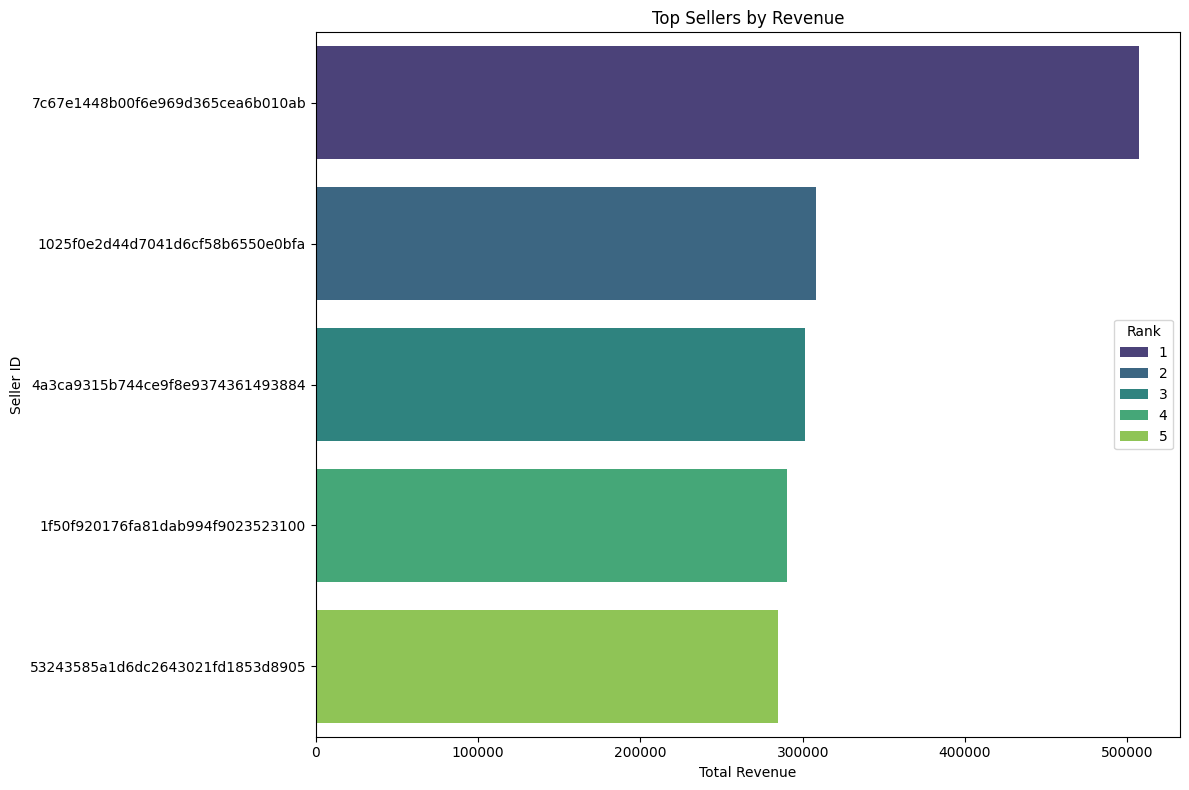

In [109]:
plt.figure(figsize=(12, 8))

sns.barplot(x='payment_value', y='seller_id', data=df, palette='viridis', hue='rank', dodge=False)

plt.xlabel('Total Revenue')
plt.ylabel('Seller ID')
plt.title('Top Sellers by Revenue')

plt.legend(title='Rank', loc='center right')

plt.tight_layout()
plt.show()


In [4]:
payment_types = payments_df.groupby("payment_type").size().reset_index(name="total_payments")
print(payment_types)


  payment_type  total_payments
0          UPI           19784
1  credit_card           76795
2   debit_card            1529
3  not_defined               3
4      voucher            5775


The analysis of payment types reveals that credit cards are the most popular method, accounting for 76,795 transactions, which underscores their dominance in the payment landscape. UPI follows as a significant contender with 19,784 payments, indicating a growing trend in digital payment options. Vouchers also play a role with 5,775 transactions, while debit cards and not defined methods account for a smaller share, with only 1,529 and 3 transactions, respectively.

In [8]:
query = """SELECT payment_type, COUNT(*) AS total_payments
FROM payments
GROUP BY payment_type;"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Payment Type", "Total Payments"])
df.head()

Payment Type  Total Payments
0  credit_card           76795
1          UPI           19784
2      voucher            5775
3   debit_card            1529
4  not_defined               3

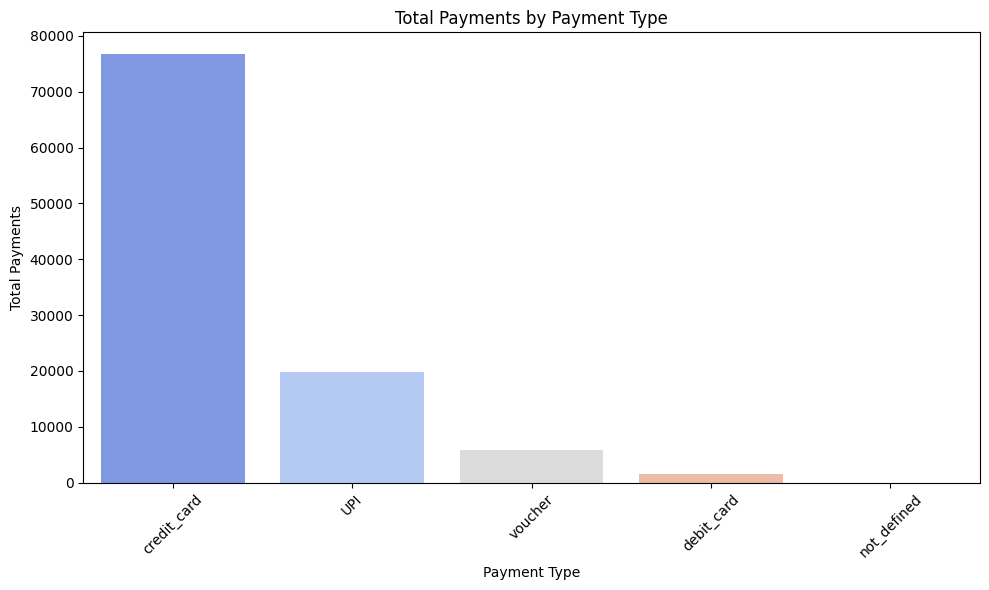

In [9]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Payment Type', y='Total Payments', data=df, palette='coolwarm')

plt.title('Total Payments by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Payments')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [10]:
correlation = payments_df["payment_installments"].corr(payments_df["payment_value"])
print(f"Correlation between installments and order value: {correlation}")


Correlation between installments and order value: 0.33081084451898535


The analysis reveals a correlation of 0.33 between the number of payment installments and the order value. This moderate positive correlation suggests that as the payment installments increase, the order value tends to rise as well. This insight indicates that customers may be more inclined to make larger purchases when given the flexibility of installment payments

# Order Delivery Insights
Analyze order delivery timelines, comparing estimated delivery date with the actual delivery date.

In [21]:
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"], errors='coerce')
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"], errors='coerce')

orders_df["delivery_delay_days"] = (orders_df["order_delivered_customer_date"] - orders_df["order_estimated_delivery_date"]).dt.days

print(orders_df["delivery_delay_days"].mean())

print(orders_df["delivery_delay_days"].median())

#print(orders_df[["order_id", "delivery_delay_days"]])


-11.876881296902857
-12.0


The analysis of delivery delays reveals an average delay of approximately -11.88 days, with a median delay of -12 days. This negative value indicates that, on average, orders are being delivered about 12 days earlier than their estimated delivery dates. This finding highlights the efficiency of the delivery process, suggesting that customers may receive their orders ahead of schedule, which can enhance customer satisfaction and potentially improve repeat business.

In [13]:
query = """SELECT 
    order_id,
    DATEDIFF(order_delivered_customer_date, order_estimated_delivery_date) AS delivery_delay_days
FROM orders;"""



cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["order_id", "delivery_delay_days"])    

df = df.head()
df

order_id  delivery_delay_days
0  e481f51cbdc54678b7cc49136f2d6af7                 -8.0
1  53cdb2fc8bc7dce0b6741e2150273451                 -6.0
2  47770eb9100c2d0c44946d9cf07ec65d                -18.0
3  949d5b44dbf5de918fe9c16f97b45f8a                -13.0
4  ad21c59c0840e6cb83a9ceb5573f8159                -10.0

# The most frequently purchased products.


In [31]:
merge_df = pd.merge(order_items_df,products_df,on = "product_id")

most_frequent_products = merge_df.groupby(["product category"]).size().reset_index(name="total_purchases").sort_values(by="total_purchases", ascending=False).head(10)

most_frequent_products


product category  total_purchases
49        bed table bath            11115
30         HEALTH BEAUTY             9670
68         sport leisure             8641
24  Furniture Decoration             8334
53  computer accessories             7827
61            housewares             6964
45       Watches present             5991
71             telephony             4545
28          Garden tools             4347
47            automotive             4235

The analysis of product categories reveals that the "Bed Table Bath" category leads with 11,115 purchases, followed closely by "Health Beauty" with 9,670 purchases and "Sport Leisure" at 8,641 purchases. Other notable categories include "Furniture Decoration" and "Computer Accessories," with 8,334 and 7,827 purchases, respectively.

In [16]:
query = """SELECT product_id, COUNT(*) AS total_purchases
FROM order_items
GROUP BY product_id
ORDER BY total_purchases DESC
LIMIT 10;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["product_id", "total_purchases"])    

df = df.head()
df

product_id  total_purchases
0  aca2eb7d00ea1a7b8ebd4e68314663af              527
1  99a4788cb24856965c36a24e339b6058              488
2  422879e10f46682990de24d770e7f83d              484
3  389d119b48cf3043d311335e499d9c6b              392
4  368c6c730842d78016ad823897a372db              388

In [57]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id); """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
df

seller_id        revenue  rank
0  7c67e1448b00f6e969d365cea6b010ab  507166.907302     1
1  1025f0e2d44d7041d6cf58b6550e0bfa  308222.039840     2
2  4a3ca9315b744ce9f8e9374361493884  301245.269765     3
3  1f50f920176fa81dab994f9023523100  290253.420128     4
4  53243585a1d6dc2643021fd1853d8905  284903.080498     5

In [61]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
df

seller_id        revenue  rank
0  7c67e1448b00f6e969d365cea6b010ab  507166.907302     1
1  1025f0e2d44d7041d6cf58b6550e0bfa  308222.039840     2
2  4a3ca9315b744ce9f8e9374361493884  301245.269765     3
3  1f50f920176fa81dab994f9023523100  290253.420128     4
4  53243585a1d6dc2643021fd1853d8905  284903.080498     5

# Top 5  customer_city where most orders are placed

In [19]:

merged_data = pd.merge(customers_df, orders_df, on="customer_id")

total_orders_per_city = merged_data.groupby("customer_city").size().sort_values(ascending = False).reset_index(name="total_orders")

total_orders_per_city


customer_city  total_orders
0          sao paulo         15540
1     rio de janeiro          6882
2     belo horizonte          2773
3           brasilia          2131
4           curitiba          1521
...              ...           ...
4114          ibiara             1
4115      rio espera             1
4116  rio dos indios             1
4117  rio dos cedros             1
4118          lagoao             1

[4119 rows x 2 columns]

We can see that São Paulo has the highest number of orders placed, with a total of 15,540 orders, followed by Rio de Janeiro with 6,882 orders. This indicates a strong market presence in São Paulo, suggesting that businesses may benefit from targeted marketing and resource allocation in this region to further capitalize on consumer demand.

In [23]:
query = """ SELECT c.customer_city, COUNT(o.order_id) AS total_orders
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_city
order by total_orders desc;
 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer City", "Total Orders"])
df = df.head()
df

Customer City  Total Orders
0       sao paulo         15540
1  rio de janeiro          6882
2  belo horizonte          2773
3        brasilia          2131
4        curitiba          1521

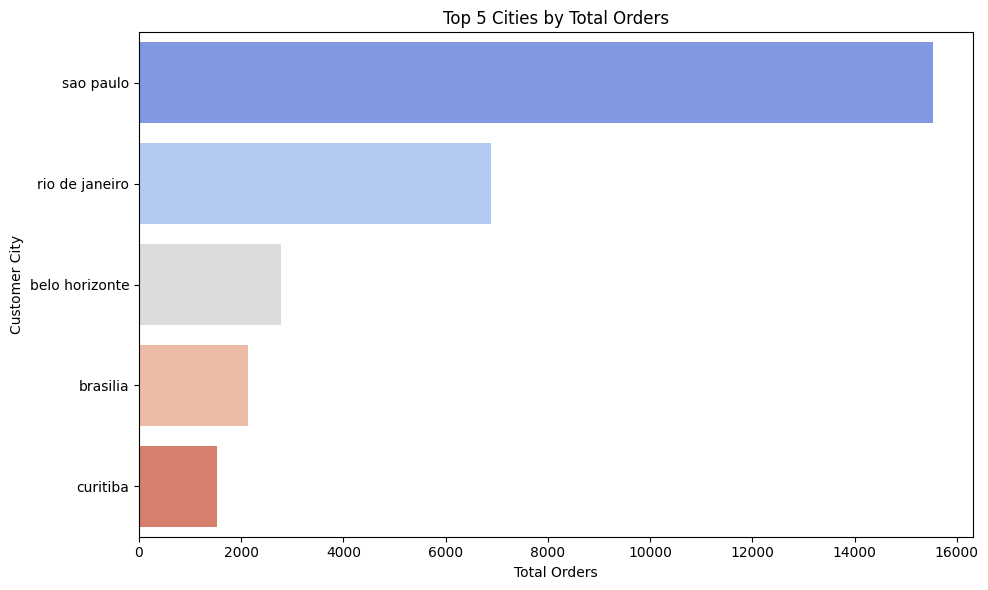

In [24]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Total Orders', y='Customer City', data=df, palette='coolwarm')

plt.title('Top 5 Cities by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Customer City')

plt.tight_layout()
plt.show()


# Top 5 products with the highest freight_value 

In [26]:
top_5_freight_products = order_items_df.sort_values(by="freight_value", ascending=False).head(5)

top_5_freight_products


order_id  order_item_id  \
73486  a77e1550db865202c56b19ddc6dc4d53              1   
28044  3fde74c28a3d5d618c00f26d51baafa0              1   
3303   076d1555fb53a89b0ef4d529e527a0f6              1   
69797  9f49bd16053df810384e793386312674              1   
16731  264a7e199467906c0727394df82d1a6a              1   

                             product_id                         seller_id  \
73486  ec31d2a17b299511e7c8627be9337b9b  257e61d3251fb5efb9daadddbc2cf7ca   
28044  a3cd9517ebf5a50dca25acce54f3b171  6fa9202c10491e472dffd59a3e82b2a3   
3303   a3cd9517ebf5a50dca25acce54f3b171  6fa9202c10491e472dffd59a3e82b2a3   
69797  256a9c364b75753b97bee410c9491ad8  5c030029b5916fed0986310385ec9009   
16731  97c948ebc8c04b26b7bbb095d4228f2a  17f51e7198701186712e53a39c564617   

       shipping_limit_date    price  freight_value  
73486  2018-04-25 06:55:13   979.00         409.68  
28044  2018-08-22 03:15:09  2338.08         375.28  
3303   2018-08-07 04:35:22  2338.08         375.28  
69797  2018-08-02 03:44:28  1149.00         339.59  
16731  2018-04-23 17:15:10  1050.00         338.30

We can see the top five products with the highest freight values, highlighting significant shipping costs associated with these items. The product with the highest freight cost is linked to an order priced at $979.00 with a freight charge of $409.68. Understanding these freight costs is crucial for pricing strategies and optimizing logistics, as high shipping fees can impact overall profitability and customer satisfaction.

In [34]:
top_5_freight_products = order_items_df.sort_values(by="freight_value", ascending=False).head(5)

top_5_freight_products


order_id  order_item_id  \
73486  a77e1550db865202c56b19ddc6dc4d53              1   
28044  3fde74c28a3d5d618c00f26d51baafa0              1   
3303   076d1555fb53a89b0ef4d529e527a0f6              1   
69797  9f49bd16053df810384e793386312674              1   
16731  264a7e199467906c0727394df82d1a6a              1   

                             product_id                         seller_id  \
73486  ec31d2a17b299511e7c8627be9337b9b  257e61d3251fb5efb9daadddbc2cf7ca   
28044  a3cd9517ebf5a50dca25acce54f3b171  6fa9202c10491e472dffd59a3e82b2a3   
3303   a3cd9517ebf5a50dca25acce54f3b171  6fa9202c10491e472dffd59a3e82b2a3   
69797  256a9c364b75753b97bee410c9491ad8  5c030029b5916fed0986310385ec9009   
16731  97c948ebc8c04b26b7bbb095d4228f2a  17f51e7198701186712e53a39c564617   

       shipping_limit_date    price  freight_value  
73486  2018-04-25 06:55:13   979.00         409.68  
28044  2018-08-22 03:15:09  2338.08         375.28  
3303   2018-08-07 04:35:22  2338.08         375.28  
69797  2018-08-02 03:44:28  1149.00         339.59  
16731  2018-04-23 17:15:10  1050.00         338.30

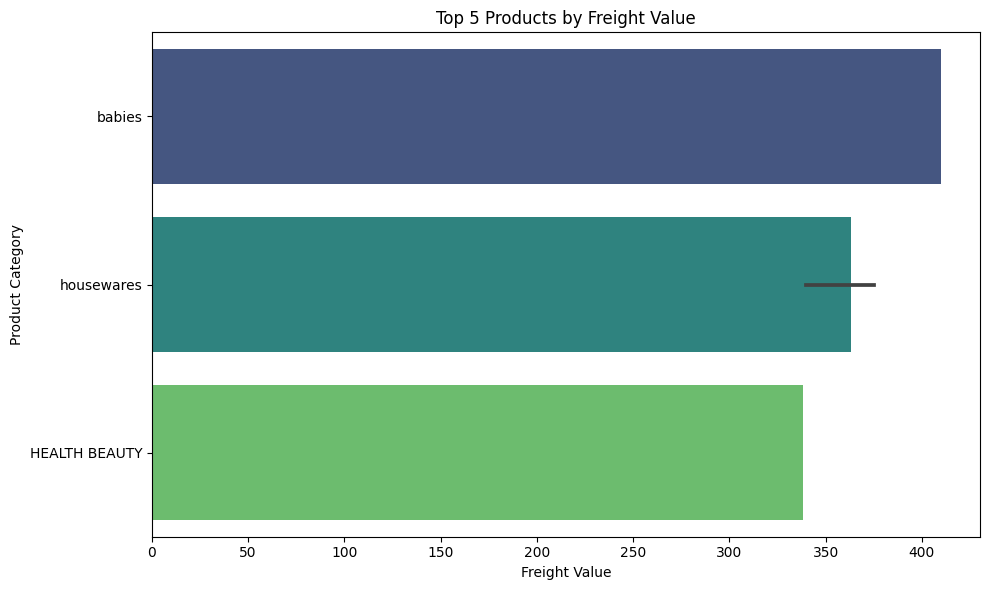

In [33]:
top_5_freight_products = top_5_freight_products.merge(products_df[['product_id', 'product category']], on='product_id')

plt.figure(figsize=(10, 6))

sns.barplot(x='freight_value', y='product category', data=top_5_freight_products, palette='viridis')

plt.title('Top 5 Products by Freight Value')
plt.xlabel('Freight Value')
plt.ylabel('Product Category')

plt.tight_layout()
plt.show()


In [35]:
query = """ SELECT * 
FROM order_items
ORDER BY freight_value DESC
LIMIT 5;
 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'])
df = df.head()
df

order_id  order_item_id  \
0  a77e1550db865202c56b19ddc6dc4d53              1   
1  3fde74c28a3d5d618c00f26d51baafa0              1   
2  076d1555fb53a89b0ef4d529e527a0f6              1   
3  9f49bd16053df810384e793386312674              1   
4  264a7e199467906c0727394df82d1a6a              1   

                         product_id                         seller_id  \
0  ec31d2a17b299511e7c8627be9337b9b  257e61d3251fb5efb9daadddbc2cf7ca   
1  a3cd9517ebf5a50dca25acce54f3b171  6fa9202c10491e472dffd59a3e82b2a3   
2  a3cd9517ebf5a50dca25acce54f3b171  6fa9202c10491e472dffd59a3e82b2a3   
3  256a9c364b75753b97bee410c9491ad8  5c030029b5916fed0986310385ec9009   
4  97c948ebc8c04b26b7bbb095d4228f2a  17f51e7198701186712e53a39c564617   

   shipping_limit_date    price  freight_value  
0  2018-04-25 06:55:13   979.00         409.68  
1  2018-08-22 03:15:09  2338.08         375.28  
2  2018-08-07 04:35:22  2338.08         375.28  
3  2018-08-02 03:44:28  1149.00         339.59  
4  2018-04-23 17:15:10  1050.00         338.30

# Total Orders and Average Freight Value per Seller

In [17]:
seller_analysis = order_items_df.groupby('seller_id').agg(
    total_orders=('order_id', 'count'),
    avg_freight=('freight_value', 'mean')
).reset_index()

seller_analysis = seller_analysis.sort_values(by='total_orders', ascending=False).head()

seller_analysis


seller_id  total_orders  avg_freight
1235  6560211a19b47992c3666cc44a7e94c0          2033    13.753537
881   4a3ca9315b744ce9f8e9374361493884          1987    17.648234
368   1f50f920176fa81dab994f9023523100          1931    18.211170
2481  cc419e0650a3c5ba77189a1882b7556a          1775    14.461403
2643  da8622b14eb17ae2831f4ac5b9dab84a          1551    16.090103

We can see the top five sellers based on total orders, with the leading seller completing 2,033 orders and maintaining an average freight cost of approximately $13.75. This analysis reveals that these sellers not only have high order volumes but also manage relatively low shipping costs, indicating effective logistics operations. Understanding these dynamics can help in identifying best practices and optimizing seller performance across the platform.

In [23]:
query = """
SELECT seller_id, COUNT(order_id) AS total_orders, AVG(freight_value) AS avg_freight
FROM order_items
GROUP BY seller_id;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['seller_id', 'total_orders', 'avg_freight'])

df_top = df.head()
df_top

seller_id  total_orders  avg_freight
0  48436dade18ac8b2bce089ec2a041202           151    19.284305
1  dd7ddc04e1b6c2c614352b383efe2d36           143    20.234196
2  5b51032eddd242adc84c38acab88f23d            14    19.210714
3  9d7a1d34a5052409006425275ba1c2b4            16    17.315625
4  df560393f3a51e74553ab94004ba5c87            29    20.901724

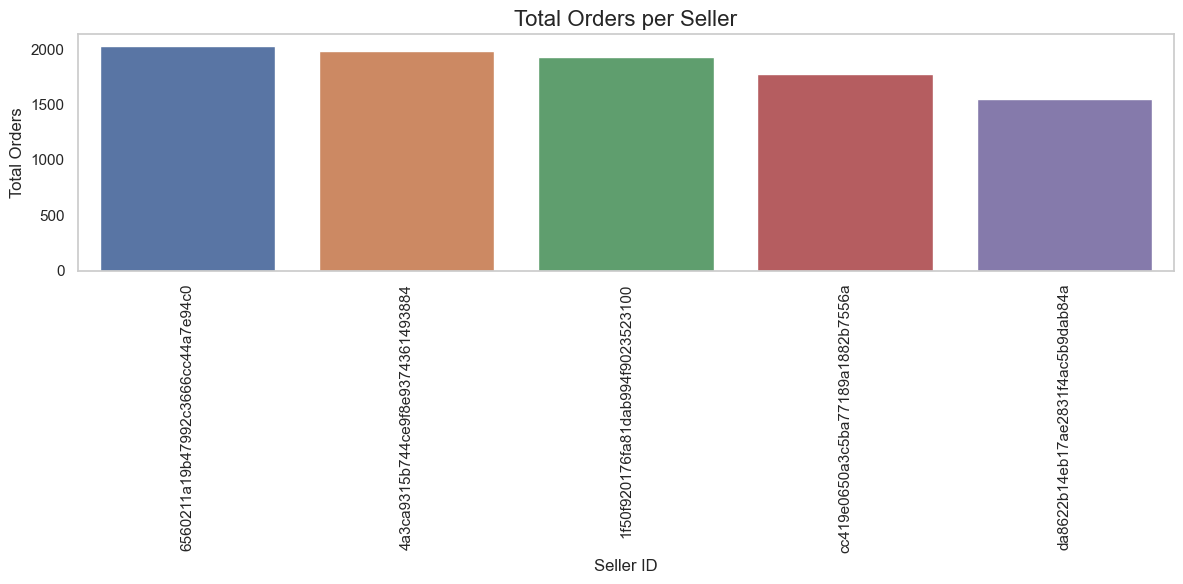

In [20]:
seller_analysis = seller_analysis.head()

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.barplot(x='seller_id', y='total_orders', data=seller_analysis)
plt.title('Total Orders per Seller', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)
plt.show()

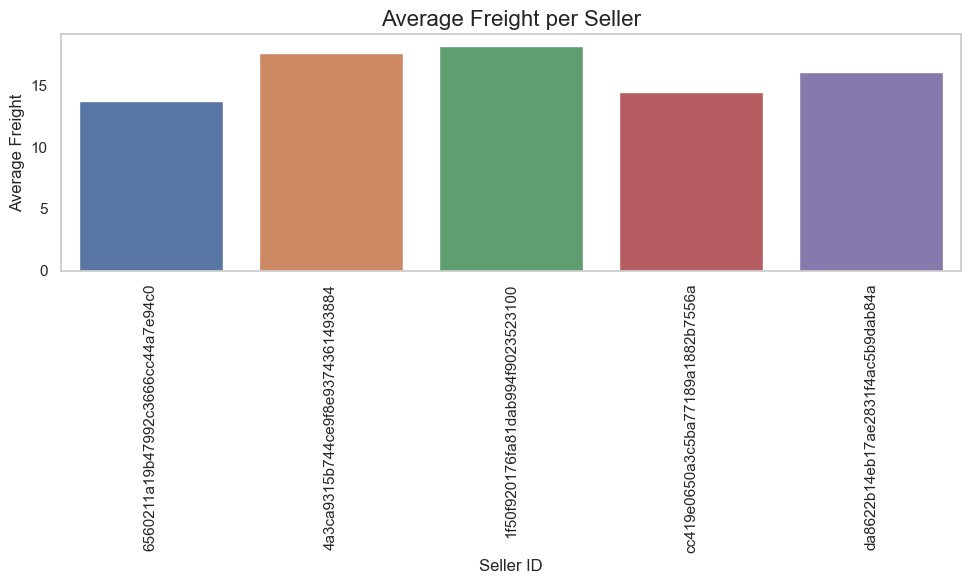

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='seller_id', y='avg_freight', data=seller_analysis)
plt.title('Average Freight per Seller', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Average Freight', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)
plt.show()


# Most Frequently Purchased Product

In [25]:
most_frequent_product = order_items_df['product_id'].value_counts().reset_index().rename(
    columns={'index': 'product_id', 'product_id': 'product_count'}
).head(5)

most_frequent_product


product_count  count
0  aca2eb7d00ea1a7b8ebd4e68314663af    527
1  99a4788cb24856965c36a24e339b6058    488
2  422879e10f46682990de24d770e7f83d    484
3  389d119b48cf3043d311335e499d9c6b    392
4  368c6c730842d78016ad823897a372db    388

In [30]:
query_frequent = """
    SELECT product_id, COUNT(order_item_id) AS product_count
    FROM order_items
    GROUP BY product_id
    ORDER BY product_count DESC
    LIMIT 5;
"""
cur.execute(query_frequent)
frequent_products = cur.fetchall()

frequent_products_df = pd.DataFrame(frequent_products, columns=['product_id', 'product_count'])
frequent_products_df


product_id  product_count
0  aca2eb7d00ea1a7b8ebd4e68314663af            527
1  99a4788cb24856965c36a24e339b6058            488
2  422879e10f46682990de24d770e7f83d            484
3  389d119b48cf3043d311335e499d9c6b            392
4  368c6c730842d78016ad823897a372db            388

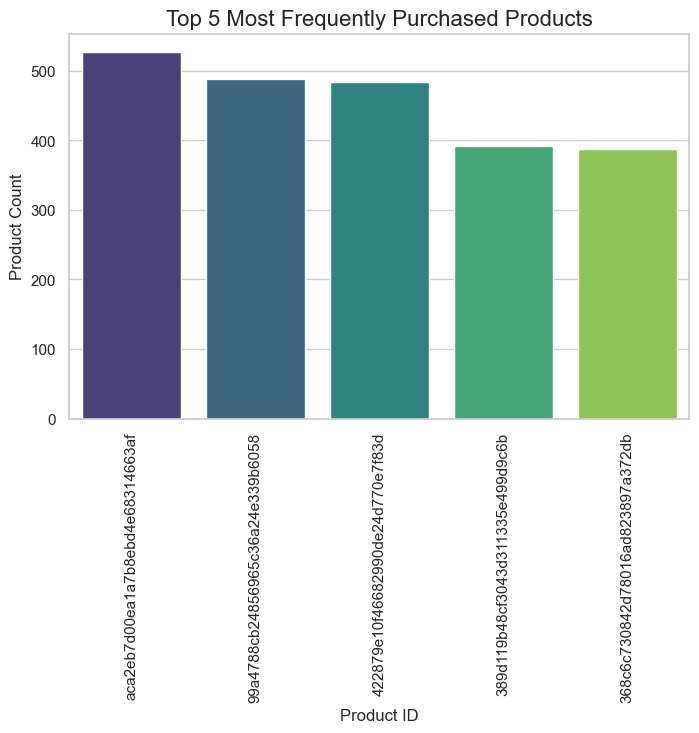

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.barplot(x='product_id', y='product_count', data=frequent_products_df, palette='viridis')

plt.title('Top 5 Most Frequently Purchased Products', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Product Count', fontsize=12)
plt.show()


# Average Delivery Time per Seller

In [38]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

merged_df = pd.merge(order_items_df, orders_df[['order_id', 'order_delivered_customer_date']], on='order_id', how='inner')

merged_df['delivery_time_days'] = (merged_df['order_delivered_customer_date'] - merged_df['shipping_limit_date']).dt.days

avg_delivery_time_per_seller = merged_df.groupby('seller_id')['delivery_time_days'].mean().reset_index()

avg_delivery_time_per_seller


seller_id  delivery_time_days
0     0015a82c2db000af6aaaf3ae2ecb0532            0.666667
1     001cca7ae9ae17fb1caed9dfb1094831            6.474359
2     001e6ad469a905060d959994f1b41e4f                 NaN
3     002100f778ceb8431b7a1020ff7ab48f            8.851852
4     003554e2dce176b5555353e4f3555ac8           -2.000000
...                                ...                 ...
3090  ffcfefa19b08742c5d315f2791395ee5                 NaN
3091  ffdd9f82b9a447f6f8d4b91554cc7dd3            3.850000
3092  ffeee66ac5d5a62fe688b9d26f83f534           11.500000
3093  fffd5413c0700ac820c7069d66d98c89            7.500000
3094  ffff564a4f9085cd26170f4732393726            1.000000

[3095 rows x 2 columns]

The analysis of average delivery times per seller reveals significant variability in performance. For instance, one seller boasts an impressive average delivery time of approximately 0.67 days, while another has an average of 8.85 days. Notably, some sellers even exhibit negative delivery times, suggesting potential data discrepancies. This information is crucial for identifying top-performing sellers and addressing logistical challenges, ultimately enhancing customer satisfaction and operational efficiency.

In [40]:
query = """
    SELECT oi.seller_id, AVG(DATEDIFF(o.order_delivered_customer_date, oi.shipping_limit_date)) AS avg_delivery_time_days
    FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
    GROUP BY oi.seller_id
    limit 10;
"""

cur.execute(query)
avg_delivery_time_per_seller = cur.fetchall()

avg_delivery_time_df = pd.DataFrame(avg_delivery_time_per_seller, columns=['seller_id', 'avg_delivery_time_days'])

avg_delivery_time_df


seller_id avg_delivery_time_days
0  0adac9fbd9a2b63cccaac4f8756c1ca8                 6.8806
1  e9779976487b77c6d4ac45f75ec7afe9                 3.8157
2  855668e0971d4dfd7bef1b6a4133b41b                 6.7299
3  fe2032dab1a61af8794248c8196565c9                 4.8295
4  1f9ab4708f3056ede07124aad39a2554                 8.5325
5  da8622b14eb17ae2831f4ac5b9dab84a                 4.7390
6  53243585a1d6dc2643021fd1853d8905                 6.9225
7  4869f7a5dfa277a7dca6462dcf3b52b2                 8.8301
8  41b39e28db005d9731d9d485a83b4c38                -0.8161
9  17e34d8224d27a541263c4c64b11a56b                 7.0231

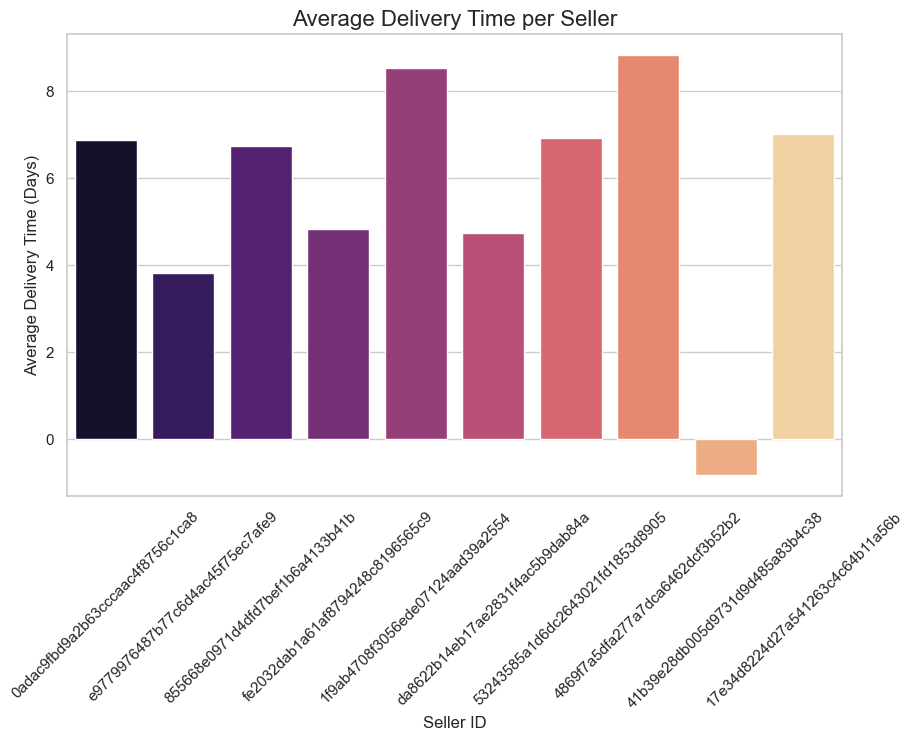

In [41]:
plt.figure(figsize=(10, 6))

sns.barplot(x='seller_id', y='avg_delivery_time_days', data=avg_delivery_time_df, palette='magma')

plt.title('Average Delivery Time per Seller', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Average Delivery Time (Days)', fontsize=12)

plt.xticks(rotation=45)

plt.show()

# Total Freight and Average Price per Product Category

In [43]:
merged_df = pd.merge(order_items_df, products_df, on='product_id')

category_analysis = merged_df.groupby('product category').agg(
    total_freight=('freight_value', 'sum'),
    avg_price=('price', 'mean')
).reset_index()

category_analysis


product category  total_freight   avg_price
0   Agro Industria e Comercio        5843.60  342.124858
1                         Art        4045.17  115.802105
2             Arts and Crafts         370.13   75.583750
3            Bags Accessories       30445.23  128.598883
4                Blu Ray DVDs        1288.74   93.740469
..                        ...            ...         ...
68              sport leisure      168607.51  114.344285
69           stationary store       46798.48   91.753369
70            technical books        4283.06   71.520824
71                  telephony       71215.79   71.213978
72                       toys       77425.95  117.548360

[73 rows x 3 columns]

The category analysis highlights that "Sport Leisure" incurs the highest total freight costs, amounting to approximately 168,607.51, while also maintaining a competitive average price of 114.34. In contrast, "Agro Industria e Comercio" and "Bags Accessories" also demonstrate significant freight expenditures, indicating strong demand in these categories. Understanding these patterns can guide strategic decisions in inventory management and pricing to maximize profitability and efficiency.

In [45]:
query = """
    SELECT p.product_category, SUM(o.freight_value) AS total_freight, AVG(o.price) AS avg_price
    FROM order_items o
    JOIN products p ON o.product_id = p.product_id
    GROUP BY p.product_category
    limit 10;
"""

cur.execute(query)
product_category_stats = cur.fetchall()

product_category_df = pd.DataFrame(product_category_stats, columns=['product_category', 'total_freight', 'avg_price'])

product_category_df


product_category  total_freight   avg_price
0         HEALTH BEAUTY  182566.729975  130.163531
1         sport leisure  168607.510262  114.344285
2            Cool Stuff   84039.099939  167.357969
3  computer accessories  147318.080095  116.513903
4       Watches present  100535.930236  201.135984
5            housewares  146149.110137   90.788148
6           electronics   46578.320220   57.913531
7                  None   28169.810006  111.999551
8                  toys   77425.950112  117.548361
9        bed table bath  204693.040410   93.296327

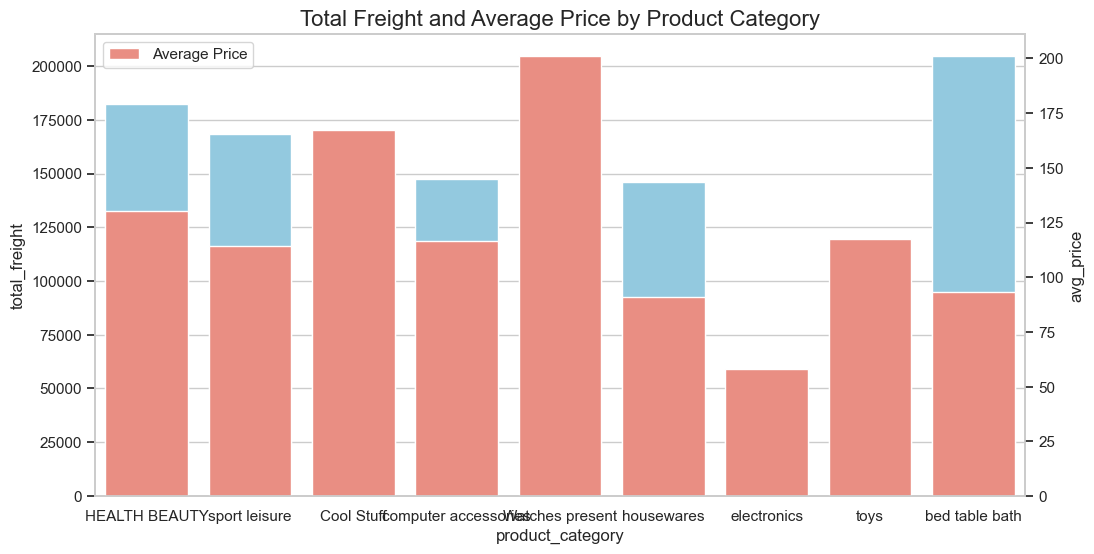

In [51]:
plt.figure(figsize=(12, 6))

sns.barplot(x='product_category', y='total_freight', data=product_category_df, color='skyblue', label='Total Freight')

ax2 = plt.twinx()

sns.barplot(x='product_category', y='avg_price', data=product_category_df, color='salmon', ax=ax2, label='Average Price')

plt.title('Total Freight and Average Price by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.grid(False)

plt.show()

# Count of Orders Delivered on Time

In [54]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

merged_df = pd.merge(order_items_df, orders_df[['order_id', 'order_delivered_customer_date']], on='order_id', how='inner')

on_time_deliveries = merged_df[merged_df['order_delivered_customer_date'] <= merged_df['shipping_limit_date']].shape[0]

print(f"On-time deliveries: {on_time_deliveries}")


On-time deliveries: 23013


The analysis reveals that there are 23,013 on-time deliveries, indicating a robust performance in meeting delivery deadlines. This suggests effective logistics and order management processes, which can enhance customer satisfaction and loyalty. Maintaining this standard of timely deliveries will be crucial for sustaining positive customer experiences and driving future sales.

In [55]:
query = """
    SELECT COUNT(*) AS on_time_deliveries
    FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
    WHERE o.order_delivered_customer_date <= oi.shipping_limit_date;
"""
cur.execute(query)
on_time_deliveries = cur.fetchone()

print(f"On-time deliveries: {on_time_deliveries[0]}")


On-time deliveries: 23013


# Analyze whether there is any correlation between the number of payment installments and the total order value

In [62]:
import pandas as pd

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

merged_df = pd.merge(payments_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id', how='inner')

correlation = merged_df[['payment_installments', 'payment_value']].corr().iloc[0, 1]

print(f"Correlation between payment installments and total payment value: {correlation}")


Correlation between payment installments and total payment value: 0.3308108445189887


The analysis reveals a correlation of 0.33 between payment installments and total payment value, suggesting a moderate positive relationship. This indicates that as the number of installments increases, the total payment value tends to rise as well. Understanding this relationship can help in optimizing payment options to enhance customer satisfaction and potentially increase sales.

# Calculate the average payment value for each payment method

In [72]:
avg_payment_value_per_method = payments_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending = False).reset_index()

avg_payment_value_per_method


payment_type  payment_value
0  credit_card     163.319021
1          UPI     145.034435
2   debit_card     142.570170
3      voucher      65.703354
4  not_defined       0.000000

The analysis of average payment values by method indicates that credit cards are the most commonly used payment option, with an average value of approximately 163.32. This is followed by UPI and debit cards, both of which also show significant usage. Conversely, vouchers and undefined payment methods reflect much lower average values. This insight can guide businesses in prioritizing payment options that drive higher transaction values, enhancing overall sales performance.

In [75]:
query = """
    SELECT payment_type, AVG(payment_value) AS avg_payment_value
    FROM payments
    GROUP BY payment_type
    order by avg_payment_value desc;
"""

cur.execute(query)
avg_payment_values = cur.fetchall()

avg_payment_values = pd.DataFrame(avg_payment_values, columns = ["payment_type","avg_payment_value"])

avg_payment_values

payment_type  avg_payment_value
0  credit_card         163.319021
1          UPI         145.034435
2   debit_card         142.570170
3      voucher          65.703354
4  not_defined           0.000000

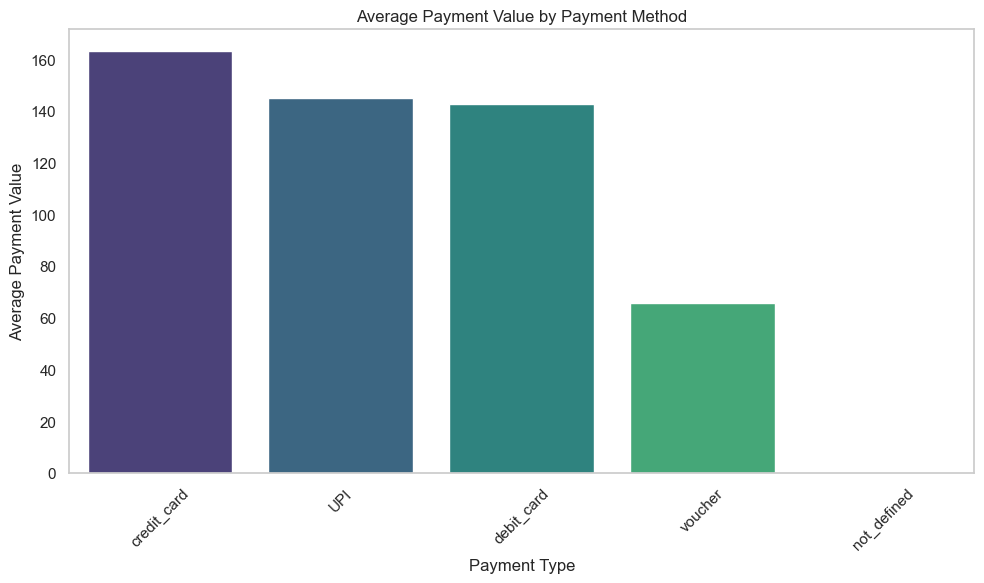

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_payment_values, x='payment_type', y='avg_payment_value', palette='viridis')

plt.title('Average Payment Value by Payment Method')
plt.xlabel('Payment Type')
plt.ylabel('Average Payment Value')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

#  Find the top 5 cities with the highest number of orders delivered.

In [58]:
merged_data = pd.merge(customers_df, orders_df, on="customer_id")

top_5_cities = merged_data.groupby("customer_city").size().reset_index(name="total_orders").sort_values(by="total_orders", ascending=False).head(5)

top_5_cities


customer_city  total_orders
3597       sao paulo         15540
3155  rio de janeiro          6882
453   belo horizonte          2773
558         brasilia          2131
1143        curitiba          1521

The data reveals that São Paulo stands out as the city with the highest number of orders, totaling 15,540. Following it, Rio de Janeiro and Belo Horizonte also show significant order volumes, with 6,882 and 2,773 orders, respectively. This information highlights the concentration of customer activity in these urban areas, which can be vital for targeted marketing and inventory management strategies.

In [40]:
query = """ SELECT c.customer_city, COUNT(o.order_id) AS total_orders
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_city
ORDER BY total_orders DESC
LIMIT 5;
;
 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['Customer City', 'Total Orders'])
df = df.head()
df

Customer City  Total Orders
0       sao paulo         15540
1  rio de janeiro          6882
2  belo horizonte          2773
3        brasilia          2131
4        curitiba          1521

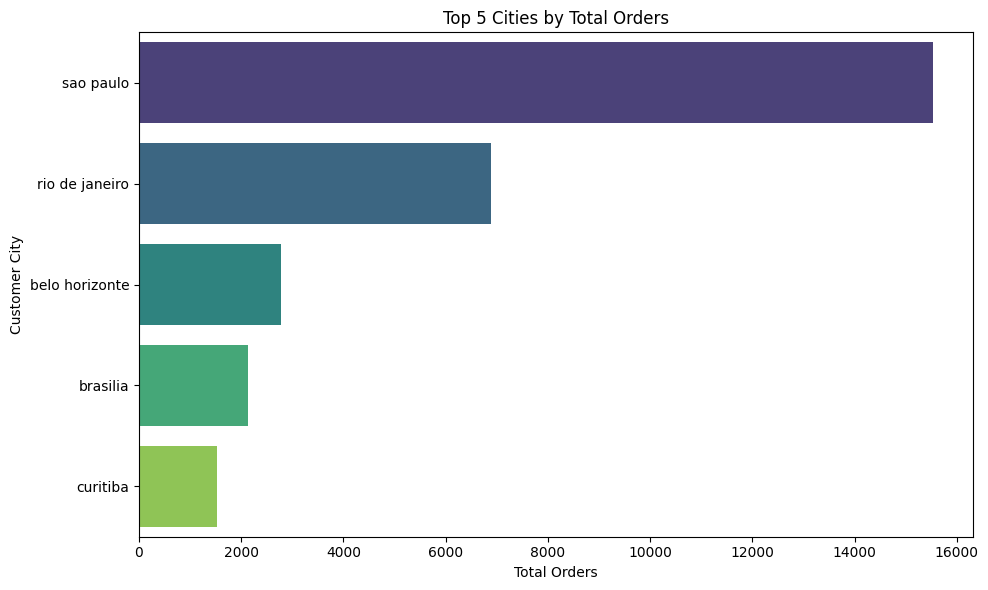

In [41]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Total Orders', y='Customer City', data=df, palette='viridis')

plt.title('Top 5 Cities by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Customer City')

plt.tight_layout()
plt.show()


#  Find all orders that took more than the estimated delivery date to be delivered.

In [43]:
late_deliveries = orders_df[orders_df["order_delivered_customer_date"] > orders_df["order_estimated_delivery_date"]]

late_deliveries


order_id                       customer_id  \
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
35     8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
57     66e4624ae69e7dc89bd50222b59f581f  684fa6da5134b9e4dab731e00011712d   
...                                 ...                               ...   
99396  b3112ca67f3afd4e20cf2ee91fc4f804  6f83c71b6c044fb156d697d4130fe9b5   
99397  0fa1fab1d7c1211c824596ed5e111e3c  7f3bd6c94d2daf7b6462d1a894a775b4   
99423  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   
99425  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   
99432  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

      order_status order_purchase_timestamp    order_approved_at  \
20       delivered      2017-09-18 14:31:30  2017-09-19 04:04:09   
25       delivered      2018-02-20 23:46:53  2018-02-22 02:30:46   
35       delivered      2018-02-17 15:59:46  2018-02-17 16:15:34   
41       delivered      2017-11-24 21:27:48  2017-11-25 00:21:09   
57       delivered      2018-03-09 14:50:15  2018-03-09 15:40:39   
...            ...                      ...                  ...   
99396    delivered      2018-08-02 22:46:54  2018-08-02 23:04:06   
99397    delivered      2018-03-13 21:48:57  2018-03-13 22:40:28   
99423    delivered      2017-10-12 20:54:11  2017-10-14 03:28:24   
99425    delivered      2018-03-21 19:47:18  2018-03-21 20:05:26   
99432    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   

      order_delivered_carrier_date order_delivered_customer_date  \
20             2017-10-06 17:50:03           2017-10-09 22:23:46   
25             2018-02-26 22:25:22           2018-03-21 22:03:54   
35             2018-02-20 23:03:56           2018-03-20 00:59:25   
41             2017-12-13 21:14:05           2017-12-28 18:59:23   
57             2018-03-15 00:31:19           2018-04-03 13:28:46   
...                            ...                           ...   
99396          2018-08-15 17:42:00           2018-08-21 00:03:26   
99397          2018-03-14 19:27:23           2018-04-05 19:59:49   
99423          2017-10-17 17:04:42           2017-11-21 17:06:59   
99425          2018-03-22 21:11:58           2018-04-11 00:48:31   
99432          2017-12-20 20:25:25           2018-01-26 15:45:14   

      order_estimated_delivery_date  delivery_delay_days  
20                       2017-09-28                 11.0  
25                       2018-03-12                  9.0  
35                       2018-03-20                  0.0  
41                       2017-12-21                  7.0  
57                       2018-04-02                  1.0  
...                             ...                  ...  
99396                    2018-08-16                  5.0  
99397                    2018-04-02                  3.0  
99423                    2017-10-31                 21.0  
99425                    2018-04-09                  2.0  
99432                    2018-01-18                  8.0  

[7827 rows x 9 columns]

The analysis reveals that there are 7,827 late deliveries, where orders were delivered later than their estimated delivery dates. This indicates a significant delay in the delivery process, which may impact customer satisfaction. Addressing the underlying causes of these delays could enhance service quality and improve customer experiences in the future.

In [50]:
print("Orders that took more than the estimated delivery date to be delivered are",late_deliveries.shape[0])

Orders that took more than the estimated delivery date to be delivered are 7827


In [46]:
query = """ SELECT * 
FROM orders
WHERE order_delivered_customer_date > order_estimated_delivery_date;
 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"])
df = df.head()
df

order_id                       customer_id  \
0  203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
1  fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
2  8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
3  6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
4  66e4624ae69e7dc89bd50222b59f581f  684fa6da5134b9e4dab731e00011712d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-09-18 14:31:30  2017-09-19 04:04:09   
1    delivered      2018-02-20 23:46:53  2018-02-22 02:30:46   
2    delivered      2018-02-17 15:59:46  2018-02-17 16:15:34   
3    delivered      2017-11-24 21:27:48  2017-11-25 00:21:09   
4    delivered      2018-03-09 14:50:15  2018-03-09 15:40:39   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-06 17:50:03           2017-10-09 22:23:46   
1          2018-02-26 22:25:22           2018-03-21 22:03:54   
2          2018-02-20 23:03:56           2018-03-20 00:59:25   
3          2017-12-13 21:14:05           2017-12-28 18:59:23   
4          2018-03-15 00:31:19           2018-04-03 13:28:46   

  order_estimated_delivery_date  
0           2017-09-28 00:00:00  
1           2018-03-12 00:00:00  
2           2018-03-20 00:00:00  
3           2017-12-21 00:00:00  
4           2018-04-02 00:00:00

# Calculate the total number of products in each product category.

In [53]:
total_products_per_category = products_df.groupby("product category").size().sort_values(ascending = False).reset_index(name="total_products")

total_products_per_category


product category  total_products
0                bed table bath            3029
1                 sport leisure            2867
2          Furniture Decoration            2657
3                 HEALTH BEAUTY            2444
4                    housewares            2335
..                          ...             ...
68              House Comfort 2               5
69  Fashion Children's Clothing               5
70                     PC Gamer               3
71       insurance and services               2
72               cds music dvds               1

[73 rows x 2 columns]

The data indicates that the "bed table bath" category has the highest number of products, totaling 3,029 items, followed closely by "sport leisure" with 2,867 products. This suggests a strong market demand for home and leisure products, highlighting potential opportunities for businesses to focus their marketing and inventory strategies in these categories to meet consumer preferences effectively.

In [58]:
query = """SELECT product_category, COUNT(product_id) AS total_products
FROM products
GROUP BY product_category
order by total_products desc;
;
 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['Product Category', 'Total Products'])
df = df.head()
df

Product Category  Total Products
0        bed table bath            3029
1         sport leisure            2867
2  Furniture Decoration            2657
3         HEALTH BEAUTY            2444
4            housewares            2335

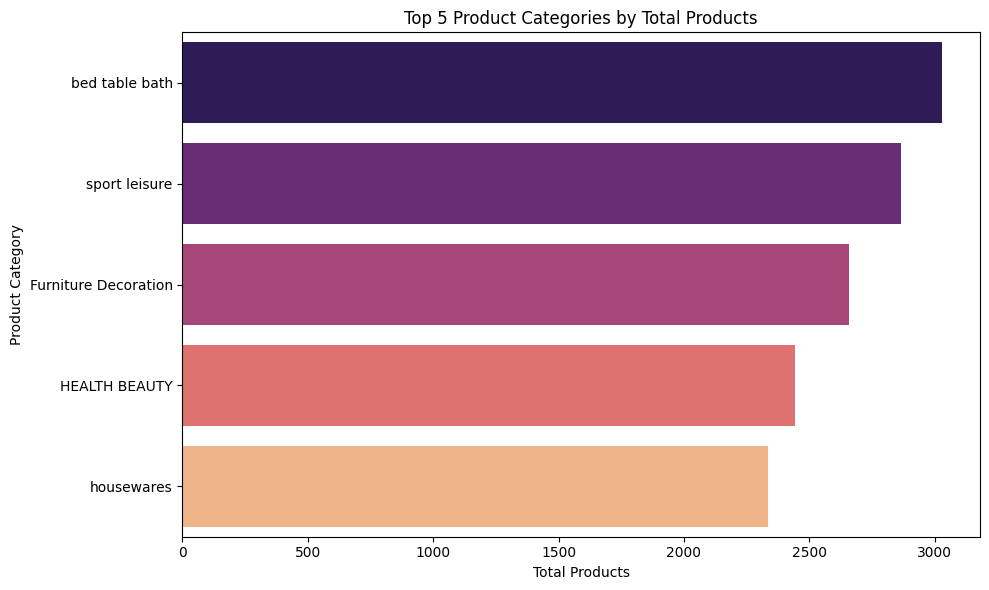

In [59]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Total Products', y='Product Category', data=df, palette='magma')

plt.title('Top 5 Product Categories by Total Products')
plt.xlabel('Total Products')
plt.ylabel('Product Category')

plt.tight_layout()
plt.show()


# Calculate the moving average of order values for each customer over their order history.

In [64]:
merged_df = payments_df.merge(orders_df, on='order_id')

sorted_df = merged_df.sort_values(by=['customer_id', 'order_purchase_timestamp'])

sorted_df['mov_avg'] = sorted_df.groupby('customer_id')['payment_value'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

result_df = sorted_df[['customer_id', 'order_purchase_timestamp', 'payment_value', 'mov_avg']]

result_df


customer_id order_purchase_timestamp  \
84862   00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   
70509   000161a058600d5901f007fab4c27140      2017-07-16 09:40:32   
83602   0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43   
90638   0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20   
39592   000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17   
...                                  ...                      ...   
102990  fffecc9f79fd8c764f843e9951b11341      2018-03-29 16:59:26   
79218   fffeda5b6d849fbd39689bb92087f431      2018-05-22 13:36:02   
31146   ffff42319e9b2d713724ae527742af25      2018-06-13 16:57:05   
65622   ffffa3172527f765de70084a7e53aae8      2017-09-02 11:53:32   
19424   ffffe8b65bbe3087b653a978c870db99      2017-09-29 14:07:03   

        payment_value  mov_avg  
84862          114.74   114.74  
70509           67.41    67.41  
83602          195.42   195.42  
90638          179.35   179.35  
39592          107.01   107.01  
...               ...      ...  
102990          71.23    27.12  
79218           63.13    63.13  
31146          214.13   214.13  
65622           45.50    45.50  
19424           18.37    18.37  

[103886 rows x 4 columns]

In [62]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

0                    1       2  \
0       00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26  114.74   
1       000161a058600d5901f007fab4c27140  2017-07-16 09:40:32   67.41   
2       0001fd6190edaaf884bcaf3d49edf079  2017-02-28 11:06:43  195.42   
3       0002414f95344307404f0ace7a26f1d5  2017-08-16 13:09:20  179.35   
4       000379cdec625522490c315e70c7a9fb  2018-04-02 13:42:17  107.01   
...                                  ...                  ...     ...   
103881  fffecc9f79fd8c764f843e9951b11341  2018-03-29 16:59:26   71.23   
103882  fffeda5b6d849fbd39689bb92087f431  2018-05-22 13:36:02   63.13   
103883  ffff42319e9b2d713724ae527742af25  2018-06-13 16:57:05  214.13   
103884  ffffa3172527f765de70084a7e53aae8  2017-09-02 11:53:32   45.50   
103885  ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03   18.37   

                 3  
0       114.739998  
1        67.410004  
2       195.419998  
3       179.350006  
4       107.010002  
...            ...  
103881   27.120001  
103882   63.130001  
103883  214.130005  
103884   45.500000  
103885   18.370001  

[103886 rows x 4 columns]

# Calculate the cumulative sales per month for each year

In [66]:
merged_df = payments_df.merge(orders_df, on='order_id')

merged_df['years'] = merged_df['order_purchase_timestamp'].dt.year
merged_df['months'] = merged_df['order_purchase_timestamp'].dt.month

monthly_sales_df = merged_df.groupby(['years', 'months'])['payment_value'].sum().reset_index(name='payment')

monthly_sales_df['cumulative_sales'] = monthly_sales_df['payment'].cumsum()

monthly_sales_df


years  months     payment  cumulative_sales
0    2016       9      252.24            252.24
1    2016      10    59090.48          59342.72
2    2016      12       19.62          59362.34
3    2017       1   138488.04         197850.38
4    2017       2   291908.01         489758.39
5    2017       3   449863.60         939621.99
6    2017       4   417788.03        1357410.02
7    2017       5   592918.82        1950328.84
8    2017       6   511276.38        2461605.22
9    2017       7   592382.92        3053988.14
10   2017       8   674396.32        3728384.46
11   2017       9   727762.45        4456146.91
12   2017      10   779677.88        5235824.79
13   2017      11  1194882.80        6430707.59
14   2017      12   878401.48        7309109.07
15   2018       1  1115004.18        8424113.25
16   2018       2   992463.34        9416576.59
17   2018       3  1159652.12       10576228.71
18   2018       4  1160785.48       11737014.19
19   2018       5  1153982.15       12890996.34
20   2018       6  1023880.50       13914876.84
21   2018       7  1066540.75       14981417.59
22   2018       8  1022425.32       16003842.91
23   2018       9     4439.54       16008282.45
24   2018      10      589.67       16008872.12

The analysis of monthly sales data reveals a significant upward trend in payment values over the years, particularly from 2017 onwards. This indicates a strong growth in customer spending and suggests that the business has effectively captured increasing demand. The cumulative sales figures highlight consistent month-over-month growth, underscoring the importance of strategic marketing and product offerings in driving revenue. Such insights can guide future business decisions and resource allocation to sustain this momentum.

In [65]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

0   1           2            3
0   2016   9      252.24       252.24
1   2016  10    59090.48     59342.72
2   2016  12       19.62     59362.34
3   2017   1   138488.04    197850.38
4   2017   2   291908.01    489758.39
5   2017   3   449863.60    939621.99
6   2017   4   417788.03   1357410.02
7   2017   5   592918.82   1950328.84
8   2017   6   511276.38   2461605.22
9   2017   7   592382.92   3053988.14
10  2017   8   674396.32   3728384.46
11  2017   9   727762.45   4456146.91
12  2017  10   779677.88   5235824.79
13  2017  11  1194882.80   6430707.59
14  2017  12   878401.48   7309109.07
15  2018   1  1115004.18   8424113.25
16  2018   2   992463.34   9416576.59
17  2018   3  1159652.12  10576228.71
18  2018   4  1160785.48  11737014.19
19  2018   5  1153982.15  12890996.34
20  2018   6  1023880.50  13914876.84
21  2018   7  1066540.75  14981417.59
22  2018   8  1022425.32  16003842.91
23  2018   9     4439.54  16008282.45
24  2018  10      589.67  16008872.12

# Calculate the year-over-year growth rate of total sales.

In [69]:
merged_df = payments_df.merge(orders_df, on='order_id')

merged_df['year'] = merged_df['order_purchase_timestamp'].dt.year

yearly_sales_df = merged_df.groupby('year')['payment_value'].sum().reset_index(name='payment')

yearly_sales_df['yoy % growth'] = yearly_sales_df['payment'].pct_change() * 100
b
yearly_sales_df


year     payment  yoy % growth
0  2016    59362.34           NaN
1  2017  7249746.73  12112.703761
2  2018  8699763.05     20.000924

The yearly sales analysis shows a remarkable increase in payment values from 2016 to 2018, with a staggering year-over-year growth of over 12,112% from 2016 to 2017, followed by a substantial 20% growth in 2018. This significant upward trend indicates a strong expansion in the business's market presence and customer engagement.

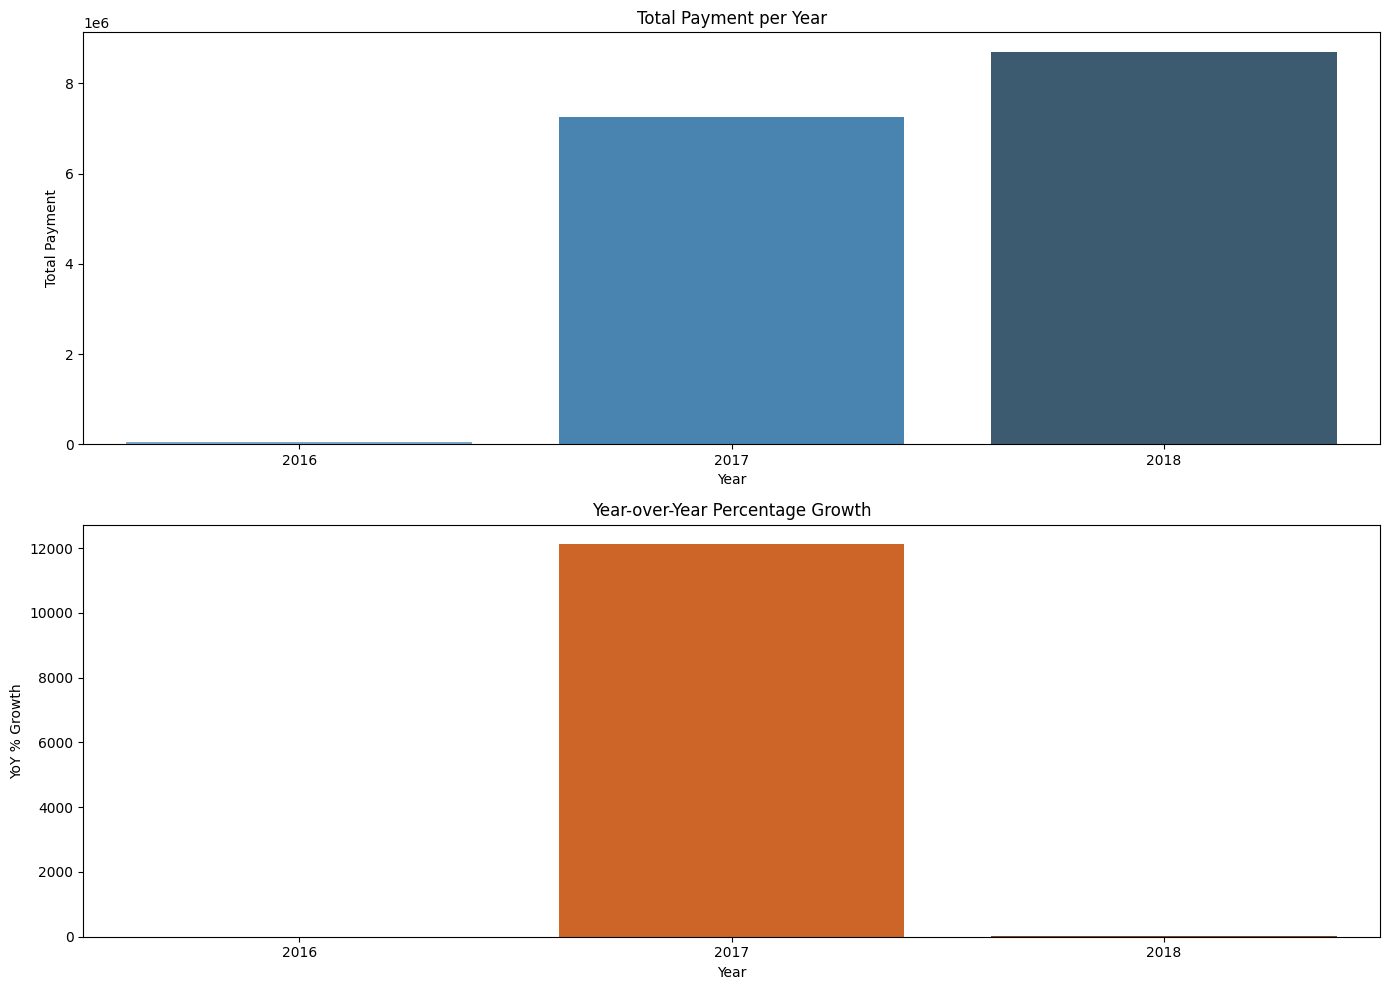

In [111]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='year', y='payment', data=yearly_sales_df, palette='Blues_d')
plt.xlabel('Year')
plt.ylabel('Total Payment')
plt.title('Total Payment per Year')

plt.subplot(2, 1, 2)
sns.barplot(x='year', y='yoy % growth', data=yearly_sales_df, palette='Oranges_d')
plt.xlabel('Year')
plt.ylabel('YoY % Growth')
plt.title('Year-over-Year Percentage Growth')

plt.tight_layout()

plt.show()


In [67]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

years  yoy % growth
0   2016           NaN
1   2017  12112.703761
2   2018     20.000924

# Identify the top 3 customers who spent the most money in each year.

In [77]:
merged_df = payments_df.merge(orders_df, on='order_id')

merged_df['year'] = merged_df['order_purchase_timestamp'].dt.year
customer_spending_df = merged_df.groupby(['year', 'customer_id'])['payment_value'].sum().reset_index(name='payment')

customer_spending_df['d_rank'] = customer_spending_df.groupby('year')['payment'].rank(method='dense', ascending=False).astype(int)

top_customers_df = customer_spending_df[customer_spending_df['d_rank'] <= 3]

top_customers_df = top_customers_df.sort_values(by=['year', 'payment'], ascending=[True, False])

top_customers_df


year                       customer_id   payment  d_rank
222    2016  a9dc96b027d1252bbac0a9b72d837fc6   1423.55       1
38     2016  1d34ed25963d5aae4cf3d7f3a4cda173   1400.74       2
84     2016  4a06381959b6670756de02e07b83815f   1227.78       3
4217   2017  1617b1357756262bfa56ab541c47bc16  13664.08       1
35452  2017  c6e2731c5b391845f6800c97401a43a9   6929.31       2
11540  2017  3fd6777bbce08a352fddd04e4a7cc8f6   6726.66       3
95348  2018  ec5b2ba62e574342386871631fafd3fc   7274.88       1
97086  2018  f48d464a0baaea338cb25f816991ab1f   6922.21       2
92872  2018  e0a2412720e9ea4f26c1ac985f6a7358   4809.44       3

The analysis of customer spending reveals that the top three customers significantly contributed to the revenue across the years 2016 to 2018. In 2016, the highest spender had a total payment of 1,423.55, while the leading customer in 2017 spent an impressive 13,664.08. By 2018, the top customer's spending reached 7,274.88. This indicates not only the loyalty of high-value customers but also a growing trend in customer spending, highlighting opportunities for targeted marketing strategies to further enhance customer retention and revenue generation.

In [76]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
df

years                                id       payment  rank
0   2016  a9dc96b027d1252bbac0a9b72d837fc6   1423.550049     1
1   2016  1d34ed25963d5aae4cf3d7f3a4cda173   1400.739990     2
2   2016  4a06381959b6670756de02e07b83815f   1227.780029     3
3   2017  1617b1357756262bfa56ab541c47bc16  13664.080078     1
4   2017  c6e2731c5b391845f6800c97401a43a9   6929.310059     2
5   2017  3fd6777bbce08a352fddd04e4a7cc8f6   6726.660156     3
6   2018  ec5b2ba62e574342386871631fafd3fc   7274.879883     1
7   2018  f48d464a0baaea338cb25f816991ab1f   6922.209961     2
8   2018  e0a2412720e9ea4f26c1ac985f6a7358   4809.439941     3

# Summary and Conclusion

The analysis of customer data from 2016 to 2018 reveals several key insights that can guide business decisions and improve sales performance.

<b>Growth in Orders and Customer Engagement:</b>

There was a significant increase in order volume, growing from 329 orders in 2016 to 54,011 in 2018, showing an upward trend in customer engagement. The growing customer base, particularly in São Paulo and Rio de Janeiro, highlights potential for targeted marketing in these regions.

<b>Top Categories and Sales Distribution:</b>

The "Bed Table Bath" and "Health Beauty" categories led in total sales, contributing 8.43% and 8.16% of overall revenue, respectively. Focusing on high-performing categories and aligning marketing efforts can further drive growth.

<b>Customer Spending Trends:</b>

Top customers significantly contributed to revenue, with the highest spender in 2017 paying $13,664.08. Encouraging installment payments, which correlate with higher order values, can boost sales.

<b>Sales by Payment Method:</b>

Credit cards dominated transactions, accounting for the majority of payments. Expanding UPI and voucher options while enhancing the user experience for credit card payments can diversify payment options and attract more customers.

<b>Efficient Delivery Process:</b>

The analysis shows that orders are being delivered on average 12 days earlier than estimated, suggesting an efficient logistics system. Maintaining or improving this trend will boost customer satisfaction and loyalty.

<b>Opportunities for Improvement:</b>

Address late deliveries (7,827 instances) to enhance customer satisfaction and streamline logistics.
Analyze the relationship between high shipping costs and product profitability to optimize pricing strategies.

# Recommendations for Increasing Sales

<b>Target High-Value Customers:</b>

Implement loyalty programs or exclusive offers for top customers, especially those with significant spending history, to encourage repeat purchases.

<b>Expand in High-Demand Categories:</b>

Increase inventory and marketing efforts in popular categories like Bed Table Bath and Health Beauty to capture growing customer interest.

<b>Optimize Payment Flexibility:</b>

Promote installment payment options to encourage higher-value purchases, as there’s a positive correlation between installment use and order value.

<b>Regional Marketing:</b>

Focus on expanding in top-performing regions like São Paulo, which has the highest number of orders, to capitalize on market demand.

<b>Maintain Fast Delivery:</b>

Leverage the existing efficient delivery process as a competitive advantage while addressing any cases of late deliveries to improve overall service quality.


# E-Commerce Operations Process

In an e-commerce environment, efficient operations require a seamless connection between inventory management, order processing, and logistics. Key processes include:

Inventory Management: Ensure sufficient stock in high-demand categories while keeping track of product turnover rates.

Order Fulfillment: Optimize picking, packing, and shipping processes to ensure timely delivery. Use data insights to predict peak times for staffing and resource allocation.

Logistics & Delivery: Partner with reliable delivery services to maintain early or on-time deliveries. Monitoring delivery performance is essential to maintain customer satisfaction.

Customer Support: A responsive customer service team is critical for handling queries related to orders, returns, and complaints, improving the overall shopping experience.